## 1. INTRODUCTION

This case study aims to give an idea of applying EDA in a real business scenario. In this case study, we will not only apply the EDA techniques but also will develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

### 1.1 BUSINESS UNDERSTANDING

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose we work for a consumer finance company which specialises in lending various types of loans to urban customers. We have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.
 
When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:


- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

1.	The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample
2.	All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

1.	Approved: The Company has approved loan Application.
2.	Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

3.	Refused: The Company had rejected the loan (because the client does not meet their requirements etc.).

4.	Unused offer:  Loan has been cancelled by the client but on different stages of the process.

In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

### 1.2 BUSINESS OBJECTIVES

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

### 1.3 DATA UNDERSTANDING

Our dataset has 3 files as explained below: 

1.	'application_data.csv' contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.
2.	'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.
3.	'columns_description.csv' is data dictionary which describes the meaning of the variables.


### 1.4 ASSUMPTIONS

1. In case of outliers and missing values we are NOT supposed to perform any sort of imputation or data conversion. We can only suggest.
2. For columns whose data type needs to be changed, if they have any missing values, then we can only mention our suggestion to be in agreement with the point 1 above.
3. Minor cosmetic changes like replacing the negative values with absolute values is permissible. But we should NOT make any changes to the value itself.

## 2. LOAN APPLICATION DATA

### 2.1 Read the data file

We will first read the application csv file which contains the loan applications of customers at the time of application. After performing certaing analysis on this current data we will look into the previous application details for further study at a later point of time.

In [16]:
# Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline

In [17]:
# Filter out the warnings

import warnings
warnings.filterwarnings('ignore')

In [18]:
# Setting maximum rows and columns display size to 200 for better visibility of data 

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [19]:
# Read the application data file

application_df = pd.read_csv('application_data.csv')
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### 2.2 Inspect the data frame

In this section we will perform the below activities -

1.	Inspect the application dataframe to understand the size of this dataset
2.	Look at the column info such as data type
3.	Summarise the numeric columns 


In [20]:
# Check the number of rows and columns in the dataframe
application_df.shape

(307511, 122)

In [21]:
# Check the column-wise info of the dataframe
application_df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [22]:
# Check the summary for the numeric columns
application_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### 2.3 Data Cleaning & Imputation - Suggestions

In this section we will perform data quality check by identifying missing values, incorrect data types etc. and by suggesting the best possible way to treat such data.

1. Check for any missing values and best possible metric to handle those missing values
2. Verify whether any column(s) has incorrect data type
3. For numerical columns, we will check for outliers
4. We will also perform binning of continuous variables


In [23]:
# Check for missing values in percentage 

round(100 * application_df.isnull().mean(),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [24]:
# Extract the column names with more than 50% data missing and their respective missing value percentage

missing50 = list(filter(lambda x: x[1] > 50 , round(100 * application_df.isnull().sum() / len(application_df.index),2).iteritems()))

# Extract the column names from the above list

cols_to_drop = [i[0] for i in missing50]
cols_to_drop

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

Since the above columns have more than 50% data missing, it would be wise to drop these columns because if we keep them, they would impact our overal analysis.

In [25]:
# Remove the columns with more than 50% missing values

application_df.drop(cols_to_drop, axis = 1, inplace = True)

# Check the shape 

application_df.shape

(307511, 81)

In [26]:

# Check for % missing values for remaining columns

round(100 * application_df.isnull().sum() / len(application_df.index),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL  

#### Missing value imputation suggestions -


1. There are few columns with missing value percentage very close to 50%. Which are -

1. YEARS_BEGINEXPLUATATION_AVG     
2. FLOORSMAX_AVG                   
3. YEARS_BEGINEXPLUATATION_MODE    
4. FLOORSMAX_MODE                  
5. YEARS_BEGINEXPLUATATION_MEDI    
6. FLOORSMAX_MEDI                  
7. TOTALAREA_MODE                 
8. EMERGENCYSTATE_MODE             

Suggestion - These columns should also be dropped as they have close to 50% data missing and if we impute them in some manner our dataset would be heavily biased and we will not be able to draw an appropriate insight.

2. There is this column OCCUPATION_TYPE  with 31.35% data missing. 

Suggestion - As OCCUPATION_TYPE is a categorical variable and is of object type and since the missing value percentage is high (31.35%) we could NOT take its mode value to fill the missing ones because that will simply make the data biased. So, it would be safe to rather create a new type 'Unknown' to fill the missing values.

3. Columns with around 13% missing values. Now we are going to consider the columns with approximately 13% missing values and suggest the possible imputation strategies for each of them. From the above list the below columns are found to have around 13% values missing. Let's inspect them. Columns to be considered -



1. AMT_REQ_CREDIT_BUREAU_HOUR
2. AMT_REQ_CREDIT_BUREAU_DAY
3. AMT_REQ_CREDIT_BUREAU_WEEK
4. AMT_REQ_CREDIT_BUREAU_MON
5. AMT_REQ_CREDIT_BUREAU_QRT
6. AMT_REQ_CREDIT_BUREAU_YEAR

In [27]:
application_df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


Suggestion - Here we can replace the missing values with the respective median value for all these columns. The reason for choosing median over mean is that these columns represent 'Number of enquiries...' which can't be a floating value. It must be a whole number and that's why we are going to use median to fill missing values. 

#### Data Type Correction -

There are certain columns in the data set which have incorrect data types. We can change them to appropriate data type.

Note: We cannot perform the data type change for some columns until we actually impute the missing data. In that case only suggestion is provided.

1. The below columns represent the number of enquires to Credit Bureau about the client. However, the data present are in float which is not correct. Here we need to change the data type to int.

- AMT_REQ_CREDIT_BUREAU_HOUR
- AMT_REQ_CREDIT_BUREAU_DAY
- AMT_REQ_CREDIT_BUREAU_WEEK
- AMT_REQ_CREDIT_BUREAU_MON
- AMT_REQ_CREDIT_BUREAU_QRT
- AMT_REQ_CREDIT_BUREAU_YEAR


2. Similarly for DAYS_REGISTRATION column, we need to change it into int as it shows the number of days.

In [28]:
# Changing DAYS_REGISTRATION column data type to int

application_df['DAYS_REGISTRATION'] = application_df['DAYS_REGISTRATION'].astype(int)

3. For CNT_FAM_MEMBERS column, which displays the number of family members of the client, we need to change it into int type as well since number of family member cannot be a float type. Before changing the data type, we must get rid of the missing values. Please note that there are only 2 rows of missing values, so we can replace it by the median value(since it must be a whole number)

In [29]:
# Check if any missing value in CNT_FAM_MEMBERS column

#application_df['CNT_FAM_MEMBERS'].isnull().sum()

In [30]:
# Replacing missing with median value for the CNT_FAM_MEMBERS column

#application_df['CNT_FAM_MEMBERS'].fillna(application_df['CNT_FAM_MEMBERS'].median(),inplace = True) 


In [31]:
# Changing CNT_FAM_MEMBERS column data type to int

#application_df['CNT_FAM_MEMBERS'] = application_df['CNT_FAM_MEMBERS'].astype(int)

4. We can change the columns which represent Yes or No values as 0 and 1 into Category data type for better plotting and thus reading. Such columns are -

- FLAG_MOBIL
- FLAG_EMP_PHONE
- FLAG_WORK_PHONE
- FLAG_CONT_MOBILE
- FLAG_PHONE
- FLAG_EMAIL

In [32]:
# Changing the data type of FLAG columns into Category

#col_list = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']

#for col in col_list:
    #application_df[col] = pd.Categorical(application_df[col])

In [33]:
# We can convert these DAYS columns into int data type as it is anyway going to be a whole number.

col_list = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for i in col_list:
    application_df[i] = application_df[i].astype(int)

# We have NOT converted the data type of DAYS_LAST_PHONE_CHANGE 
# as it has some missing values which need to be treated (replace by median) first.

In [34]:
# Verify the changes

application_df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','DAYS_REGISTRATION']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DAYS_BIRTH         307511 non-null  int32  
 1   DAYS_EMPLOYED      307511 non-null  int32  
 2   DAYS_REGISTRATION  307511 non-null  int32  
 3   DAYS_ID_PUBLISH    307511 non-null  int32  
 4   CNT_FAM_MEMBERS    307509 non-null  float64
 5   DAYS_REGISTRATION  307511 non-null  int32  
dtypes: float64(1), int32(5)
memory usage: 8.2 MB


#### Data standardization -

1. There are some columns which represent number of days but have some negative values. We need to fix that by replacing those values with their respective absolute values. The columns are -

- DAYS_BIRTH
- DAYS_EMPLOYED
- DAYS_REGISTRATION
- DAYS_ID_PUBLISH
- DAYS_LAST_PHONE_CHANGE

In [35]:
# Inspect the negative values in the DAYS columns

application_df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,-16036.995067,63815.045904,-4986.120327,-2994.202373,-962.858788
std,4363.988632,141275.766519,3522.886321,1509.450419,826.808487
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000,-4292.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000,-1570.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000,-757.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000,-274.000000
max,-7489.000000,365243.000000,0.000000,0.000000,0.000000


In [36]:
# Make a list of all DAYS columns
col_list = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

# Replace the values with their respective absolute values
for i in col_list:
    application_df[i] = abs(application_df[i])

# Verify the changes
application_df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,16036.995067,67724.742149,4986.120327,2994.202373,962.858788
std,4363.988632,139443.751806,3522.886321,1509.450419,826.808487
min,7489.000000,0.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000,274.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000,757.000000
75%,19682.000000,5707.000000,7479.500000,4299.000000,1570.000000
max,25229.000000,365243.000000,24672.000000,7197.000000,4292.000000


Note: We can create a new column based on DAYS_BIRTH to show the age of the applicant for better readability and then we can drop the DAYS_BIRTH column. Similarily we can convert the other DAYS columns to represent the value in years.


In [37]:
# application_df['AGE'] = application_df['DAYS_BIRTH'] // 365
# application_df['YEAR_IN_SERVICE'] = application_df['DAYS_EMPLOYED'] // 365
# application_df['BANK_MEMBERSHIP_DURATION'] = application_df['DAYS_REGISTRATION'] // 365

2. We can also verify some of the categorical variables.

- CODE_GENDER

In [38]:
application_df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [39]:
# Get rid of improper value XNA by replacing it with NaN - not using mode as that would be imputation

application_df['CODE_GENDER'] = application_df['CODE_GENDER'].replace('XNA',np.nan)

In [40]:
# Verify again

application_df['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

#### Outlier Analysis -

As we know, there are possibilities of having exceptionally low or high values in our data termed as outliers. It is of very much importance to identify such data points and get the data treated to avoid wrong interpretation. We are going to consider the below columns for outlier analysis.

- AMT_INCOME_TOTAL
- AMT_CREDIT
- AMT_ANNUITY
- AMT_GOODS_PRICE
- DAYS_BIRTH
- DAYS_EMPLOYED
- DAYS_REGISTRATION

In [41]:
# Defining a function to plot outliers 

def outlier_plot(var,title,label):
    
    plt.figure(figsize = [8,5])
    plt.title(title, fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    sns.boxplot(y = var)
    plt.ylabel(label, fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Grey'})
    plt.show()


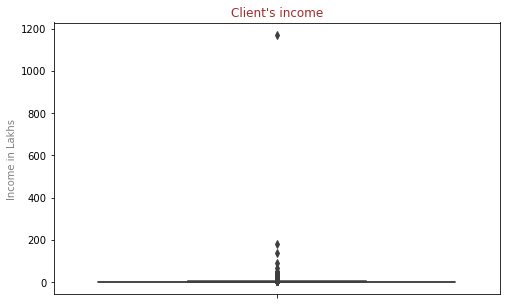

In [42]:
# Ploting boxplot on AMT_INCOME_TOTAL for outlier analysis

var = application_df['AMT_INCOME_TOTAL']/100000
title = "Client's income"
label = 'Income in Lakhs'

outlier_plot(var,title,label)

AMT_INCOME_TOTAL(Income of the client) shows that some of the applicants have very high income as compared to others.

In [43]:
# Describe to check the summary

(application_df['AMT_INCOME_TOTAL']/100000).describe()

count    307511.000000
mean          1.687979
std           2.371231
min           0.256500
25%           1.125000
50%           1.471500
75%           2.025000
max        1170.000000
Name: AMT_INCOME_TOTAL, dtype: float64

There is definitely a huge difference between 75% and the maximum value. Let's print the quantile to check the difference between 0.95 or 0.99 quantile and the maximum value.

In [44]:
# print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of AMT_INCOME_TOTAL

(application_df['AMT_INCOME_TOTAL']/100000).quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    1.4715
0.70    1.8000
0.90    2.7000
0.95    3.3750
0.99    4.7250
Name: AMT_INCOME_TOTAL, dtype: float64

AMT_INCOME_TOTAL - As we see there is a huge difference in 0.99 quantile and the maximum values. So, there are definitely outliers. As we know the income may vary from person to person, it would be good to decide on a cap value here and get rid of very high incomes. 

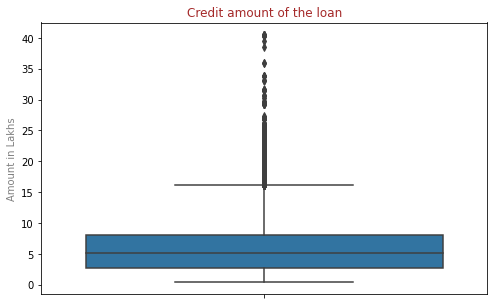

In [45]:
# Ploting boxplot on AMT_CREDIT for outlier analysis

var = application_df['AMT_CREDIT']/100000
title = "Credit amount of the loan"
label = "Amount in Lakhs"

outlier_plot(var,title,label)

AMT_CREDIT(Credit amount of loan) has some outliers and the data seem to be heavy on the lower side which implies that we have more applications in the lower range below 5 lakhs. Also since the amount credits can vary from person to person, it is justified.


In [46]:
# Describe to check the summary

(application_df['AMT_CREDIT']/100000).describe()

count    307511.000000
mean          5.990260
std           4.024908
min           0.450000
25%           2.700000
50%           5.135310
75%           8.086500
max          40.500000
Name: AMT_CREDIT, dtype: float64

We can see an increase in value after 75% but it is not very high. Let's check the quantiles.

In [47]:
# print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of AMT_CREDIT

(application_df['AMT_CREDIT']/100000).quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50     5.13531
0.70     7.55190
0.90    11.33748
0.95    13.50000
0.99    18.54000
Name: AMT_CREDIT, dtype: float64

AMT_CREDIT - In this case we have some outliers after 99% which are not very high which we can take care of by binning the values.

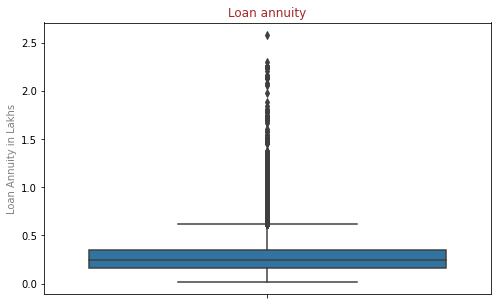

In [48]:
# Ploting boxplot on AMT_ANNUITY for outlier analysis

var = application_df['AMT_ANNUITY']/100000
title = "Loan annuity"
label = "Loan Annuity in Lakhs"

outlier_plot(var,title,label)

AMT_ANNUITY(Loan annuity) also has some outliers but it is kind of continuous. There is no sudden significant rise in the value.

In [49]:
# Describe to check the summary

(application_df['AMT_ANNUITY']/100000).describe()

count    307499.000000
mean          0.271086
std           0.144937
min           0.016155
25%           0.165240
50%           0.249030
75%           0.345960
max           2.580255
Name: AMT_ANNUITY, dtype: float64

In this case as there is not a huge difference between 75% and the maximum value also the mean and median values are not much differentare , we can impute the outliers with median value.

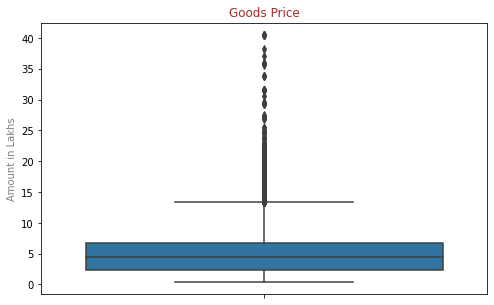

In [50]:
# Ploting boxplot on AMT_GOODS_PRICE for outlier analysis

var = application_df['AMT_GOODS_PRICE']/100000
title = "Goods Price"
label = "Amount in Lakhs"

outlier_plot(var,title,label)

In [51]:
# Describe to check the summary

(application_df['AMT_GOODS_PRICE']/100000).describe()

count    307233.000000
mean          5.383962
std           3.694465
min           0.405000
25%           2.385000
50%           4.500000
75%           6.795000
max          40.500000
Name: AMT_GOODS_PRICE, dtype: float64

In [52]:
# Describe to check the summary

(application_df['AMT_GOODS_PRICE']/100000).quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50     4.500
0.70     6.750
0.90    10.935
0.95    13.050
0.99    18.000
Name: AMT_GOODS_PRICE, dtype: float64

Mean and Median are not very different. Also, form the quantiles, the 0.99 and the maximum values are not very far apart. So, we can impute with median.

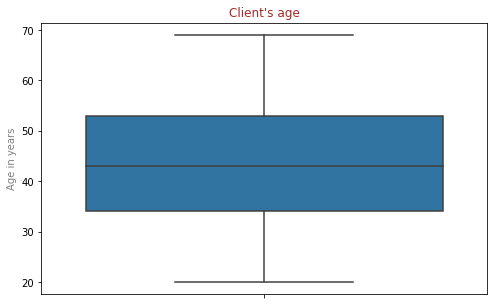

In [53]:
# Ploting boxplot on DAYS_BIRTH for outlier analysis

var = application_df['DAYS_BIRTH']//365
title = "Client's age"
label = "Age in years"

outlier_plot(var,title,label)

DAYS_BIRTH - Client's age seems to have no outliers at all. No imputation or treatment required.

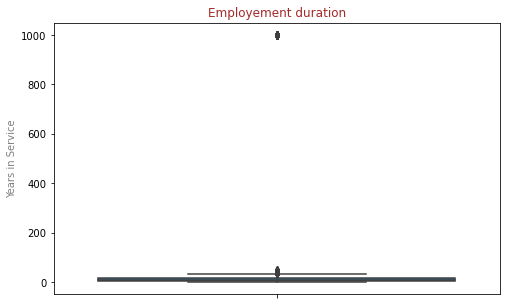

In [54]:
# Ploting boxplot on DAYS_EMPLOYED for outlier analysis

var = application_df['DAYS_EMPLOYED']//365
title = "Employement duration"
label = "Years in Service"

outlier_plot(var,title,label)

DAYS_EMPLOYED(Employment duration) data surely has huge outliers which is clearly visible from the boxplot.Some data points are showing close to 1000 years in service which is impossible.

In [55]:
# Describe to check the summary

(application_df['DAYS_EMPLOYED']/365).describe()

count    307511.000000
mean        185.547239
std         382.037676
min           0.000000
25%           2.556164
50%           6.079452
75%          15.635616
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

There is surely a huge difference in 75% and the maximum value. That explains the difference between mean and median value as well. Let's check the quantile.

In [56]:
# print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of DAYS_EMPLOYED

(application_df['DAYS_EMPLOYED']/365).quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50       6.079452
0.70      12.150685
0.90    1000.665753
0.95    1000.665753
0.99    1000.665753
Name: DAYS_EMPLOYED, dtype: float64

In [57]:
(application_df['DAYS_EMPLOYED']/365).quantile([0.5, 0.7, 0.8,0.85, 0.9])

0.50       6.079452
0.70      12.150685
0.80      25.172603
0.85    1000.665753
0.90    1000.665753
Name: DAYS_EMPLOYED, dtype: float64

In case of DAYS_EMPLOYED, we can see no difference between  0.90 quantile and the maximum value. However, there is a huge difference between 0.70 and 0.90 quantiles. Here, we can say that close to 20% data is not correct and hence is not reliable. We can cap the value at 80% in this case.

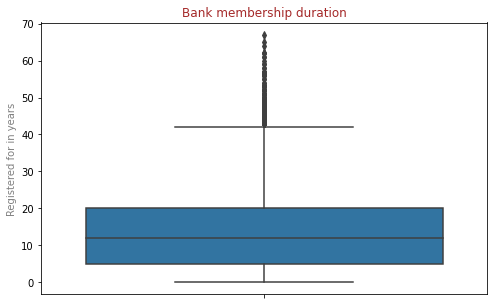

In [58]:
# Ploting boxplot on DAYS_REGISTRATION for outlier analysis

var = application_df['DAYS_REGISTRATION']//365
title = "Bank membership duration"
label = "Registered for in years"

outlier_plot(var,title,label)

In case of DAYS_REGISTRATION - Bank membership duration, we can see that we have some applicants with the bank for very long time , close to 70 years, which is rare but not impossible. There are people who tie up with a bank and stay loyal to the same one for life time.

In [59]:
# Describe to check the summary

(application_df['DAYS_REGISTRATION']/365).describe()

count    307511.000000
mean         13.660604
std           9.651743
min           0.000000
25%           5.506849
50%          12.339726
75%          20.491781
max          67.594521
Name: DAYS_REGISTRATION, dtype: float64

We dont see much difference between mean and median. So, we can replace the outliers with median value. 

#### Binning

1. We may want to bin the applicants ages into certain categories to be able to draw some insights such as - whether the loan defaulters majorly fall into any certain age groups or which age groups are much likely to repay on time etc.

In [60]:
# Check the Age Summary - Since DAYS_BIRTH is in days, we have divided it by 365 to get it in years

(application_df['DAYS_BIRTH'] // 365).describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: DAYS_BIRTH, dtype: float64

In [61]:
# Binning DAYS_BIRTH based on above summary

bins = [0,20,30,40,50,60,100]
labels = ['Below 20','20-30','30-40','40-50','50-60','Above 60']
application_df['AGE_GROUP'] = pd.cut(application_df['DAYS_BIRTH'] // 365, bins = bins, labels = labels )


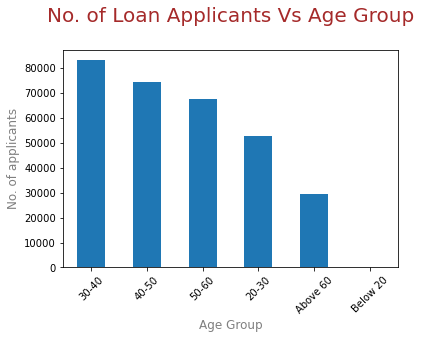

In [62]:
# Checking the values

application_df['AGE_GROUP'].value_counts().plot(kind='bar')
plt.title("No. of Loan Applicants Vs Age Group\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('No. of applicants', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Grey'})
plt.xlabel('Age Group', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Grey'})
plt.xticks(rotation=45)
plt.show()

Inference: Maximum no. of loan applications are from age group 30-40, almost no applications below 20 age group (which is understandable as this group has very less chance of having an income).

2. Let's also bin the AMT_INCOME_TOTAL to categorize the total income of the applicants. 

Note: We can make the AMT_INCOME_TOTAL data more readable by changing the unit to lakhs.

In [63]:
# Check the Total income summary - we can divide it by 100,000 for better readability

(application_df['AMT_INCOME_TOTAL']/100000).describe()

count    307511.000000
mean          1.687979
std           2.371231
min           0.256500
25%           1.125000
50%           1.471500
75%           2.025000
max        1170.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [64]:
# Binning AMT_INCOME_TOTAL based on above summary

bins = [0,1,2,5,10,20,50,1000]
labels = ['Upto 1L','1-2L','2-5L','5-10L','10-20L','20-50L','50L above']
application_df['INCOME_GROUP'] = pd.cut(application_df['AMT_INCOME_TOTAL'] / 100000, bins = bins, labels = labels )


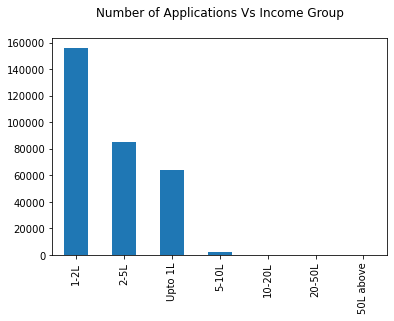

In [65]:
# Checking the values

application_df['INCOME_GROUP'].value_counts().plot(kind='bar')
plt.title("Number of Applications Vs Income Group\n")
plt.show()

Inference:

Maximum loan applicants are from lower income group i.e upto 5 lakhs. Bank should focus on this group.Also, we can cap the value at 20L.

3. We will also categorize the credit amount of the loan (AMT_CREDIT) column

In [66]:
# Check the credit amount of the loan - we can divide it by 100,000 for better readability

(application_df['AMT_CREDIT']/100000).describe()

count    307511.000000
mean          5.990260
std           4.024908
min           0.450000
25%           2.700000
50%           5.135310
75%           8.086500
max          40.500000
Name: AMT_CREDIT, dtype: float64

In [67]:
# Binning AMT_ANNUITY based on above summary

bins = [0,1,5,10,20,30,40,50,100]
labels = ['Upto 1L','1-5L','5-10L','10-20L','20-30L','30-40L','40-50L','50L above']
application_df['CREDIT_GROUP'] = pd.cut(application_df['AMT_CREDIT'] / 100000, bins = bins, labels = labels )

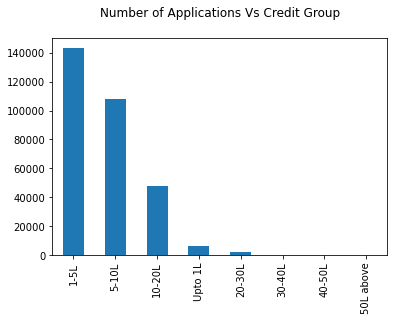

In [68]:
# Checking the values
application_df['CREDIT_GROUP'].value_counts().plot(kind='bar')
plt.title("Number of Applications Vs Credit Group\n")
plt.show()

Inferences:

The number of applicants with credit amount range 1-20L is very high. Almost none above 30L.

### 2.4 Data Analysis

#### 2.4.1	Check the Imbalance percentage

What is Imbalance Percentage?

In our data set, there is a target variable/column named 'TARGET'. It represents whether the client is a defaulter or not.
If we segregate our dataset based on this column, and if the distribution turns out to be 50-50 i.e. 50% of the applicants are defaluters and the rest 50% are NOT, then our data set would be BALANCED. In any other case, it would be considered as IMBALANCED.

In [69]:
# Checking imbalance percentage

application_df['TARGET'].value_counts(normalize = True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

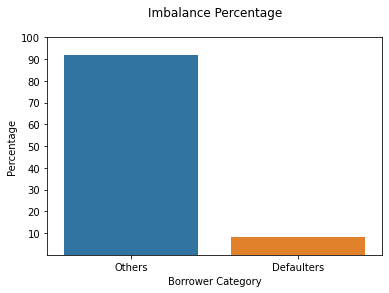

In [70]:
# Plotting imbalance percentage

#Extracting the imbalance percentage
Repayment_Status = application_df['TARGET'].value_counts(normalize=True)*100

# Defining the x values
x= ['Others','Defaulters']

# Defining the y ticks
axes= plt.axes()
axes.set_ylim([0,100])
axes.set_yticks([10,20,30,40,50,60,70,80,90,100])

# Plotting barplot
sns.barplot(x, Repayment_Status)

# Adding plot title, and x & y labels
plt.title('Imbalance Percentage\n')
plt.xlabel("Borrower Category")
plt.ylabel("Percentage")

# Displaying the plot
plt.show()

As per the above data, we can say that our data set is imbalanced with almost 8% defaulters. Rest all 92% were able to repay the loans.

#### 2.4.2	Segregate data based on TARGET column

Now, let's create 2 data sets to segregate our original data based on the TARGET column values to have defaulters in one dataframe and others in another.

In [71]:
# Creating data frame of Others

application_df0 = application_df[application_df['TARGET']==0]
application_df0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,INCOME_GROUP,CREDIT_GROUP
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,40-50,2-5L,10-20L
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50-60,Upto 1L,1-5L
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,50-60,1-2L,1-5L
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50-60,1-2L,5-10L
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970,477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,40-50,Upto 1L,1-5L


In [72]:
# Creating data frame of Defaulters

application_df1 = application_df[application_df['TARGET']==1]
application_df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,INCOME_GROUP,CREDIT_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,20-30,2-5L,1-5L
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,2628,6573,1827,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,0.9732,0.0417,0.9732,0.0417,0.9732,0.0417,0.0085,Yes,10.0,1.0,10.0,0.0,161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,50-60,1-2L,5-10L
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182,1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.9960,0.2500,0.9960,0.2500,0.9960,0.2500,0.1463,No,0.0,0.0,0.0,0.0,1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,40-50,2-5L,10-20L
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384,3597,45,4409,1,1,1,1,1,0,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,30-40,1-2L,1-5L
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,24794,365243,5391,4199,1,0,0,1,0,0,NaN,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,0.720944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Above 60,Upto 1L,1-5L


#### 2.4.3	Univariate Analysis

##### Categorical Variable Analysis

We will plot graphs of the below categorical variables to draw inferences-

- NAME_CONTRACT_TYPE
- CODE_GENDER
- OCCUPATION_TYPE
- NAME_INCOME_TYPE
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS
- NAME_HOUSING_TYPE
- INCOME_GROUP
- AGE_GROUP

In [73]:
# Defining a function to plot univariate categorical variables

def univariate_categorical_plot(category1, category2, xlabel):
    
    plt.figure(figsize = [15,7])
    plt.subplot(1,2,1)
    sns.countplot(category1)
    plt.title('Defaulters\n')
    plt.xlabel(xlabel)
    plt.xticks(rotation=45, ha='right')
    
    plt.subplot(1,2,2)
    sns.countplot(category2)
    plt.title('Others\n')
    plt.xlabel(xlabel)
    plt.xticks(rotation=45, ha='right')
    
    plt.show()


In [74]:
# Defining a function to plot defaulter percentage against univariate categorical variable

def perc_defaulter(col1, col2, title, xlabel, ylabel):
    
    tempdf = application_df[[col1,col2]].groupby([col2], as_index=False).mean()

    tempdf[col1] = tempdf[col1]*100
    tempdf.sort_values(by=col1, ascending=False, inplace=True)

    sns.barplot(x=col2, y = col1, data = tempdf)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.show()


##### NAME_CONTRACT_TYPE

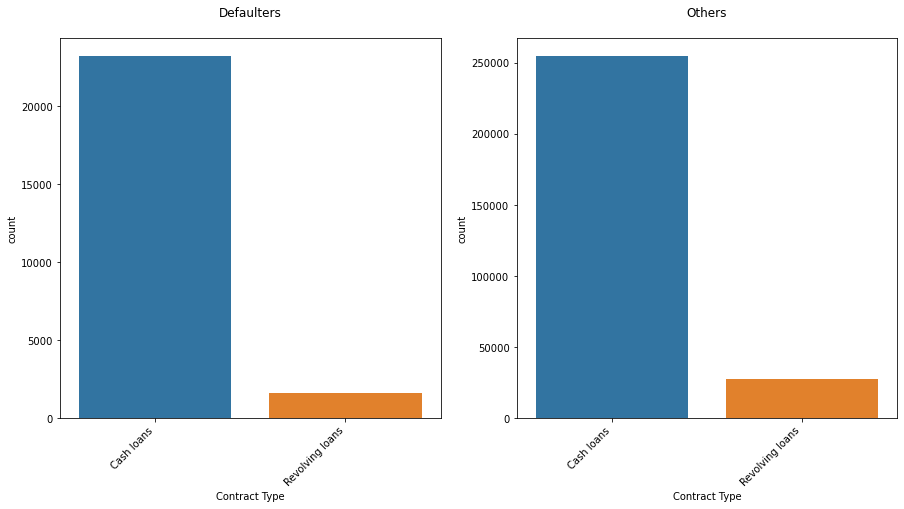

In [75]:
# Analyzing w.r.t Contract Type column

category1 = application_df1['NAME_CONTRACT_TYPE']
category2 = application_df0['NAME_CONTRACT_TYPE']
xlabel = 'Contract Type'

univariate_categorical_plot(category1, category2, xlabel)

Cash loan type contracts are high in number in both cases.

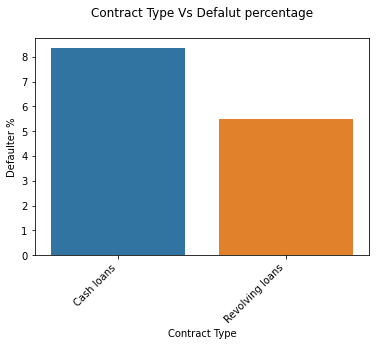

In [76]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'NAME_CONTRACT_TYPE'
title = 'Contract Type Vs Defalut percentage\n'
xlabel = 'Contract Type'
ylabel = 'Defaulter %'

perc_defaulter(col1, col2, title, xlabel, ylabel)

Cash loan contract type are more likely to fail repayment

##### CODE_GENDER

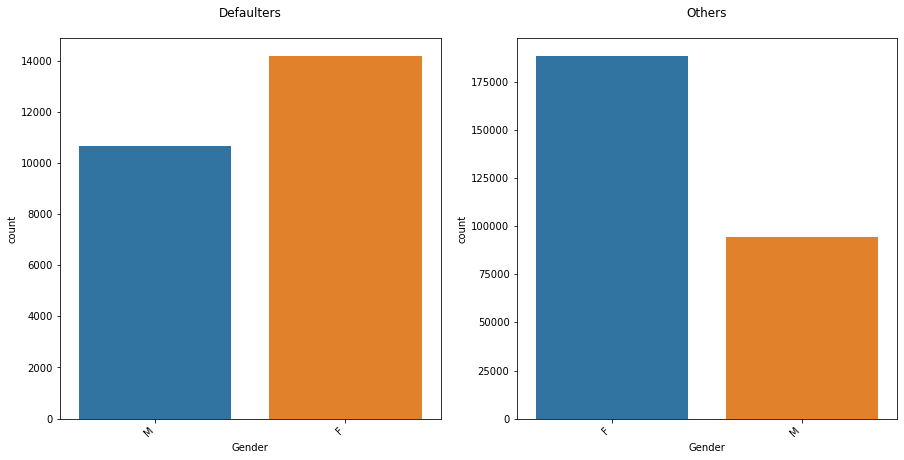

In [77]:
# Analyzing w.r.t Gender column

category1 = application_df1['CODE_GENDER']
category2 = application_df0['CODE_GENDER']
xlabel = 'Gender'

univariate_categorical_plot(category1, category2, xlabel)

In either case, we have more female clients as compared to males. But we actually need to see the percentage of defaulters in these 2 gender categories to actually say which gender is more likely to become a defaulter.

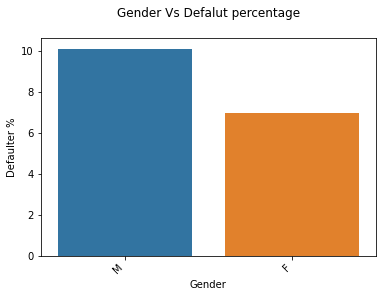

In [78]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'CODE_GENDER'
title = 'Gender Vs Defalut percentage\n'
xlabel = 'Gender'
ylabel = 'Defaulter %'

perc_defaulter(col1, col2, title, xlabel, ylabel)


As seen from the above diagram, males have comparatively higher percentage of being defaulters than females.

##### OCCUPATION_TYPE

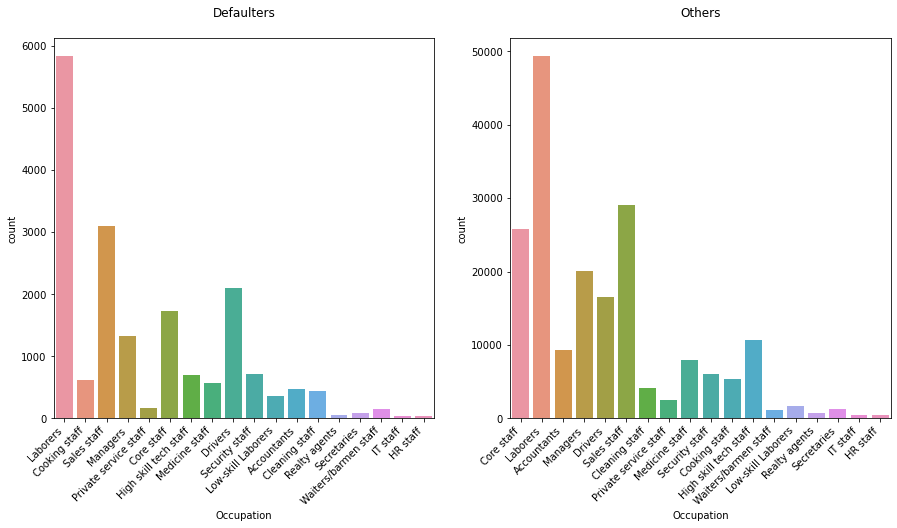

In [79]:
# Analyzing w.r.t Occupation column

category1 = application_df1['OCCUPATION_TYPE']
category2 = application_df0['OCCUPATION_TYPE']
xlabel = 'Occupation'

univariate_categorical_plot(category1, category2, xlabel)


Here we can see that in both defaluters and others category, the laborers are the maximum in number. Let's check the percentage of defaulters in each occupation category.

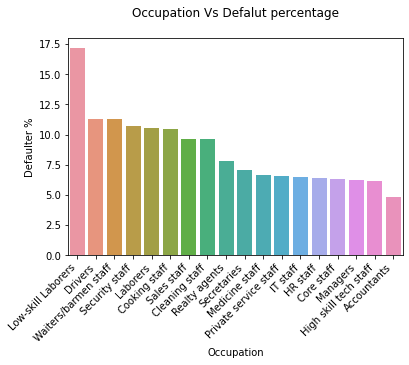

In [80]:

# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'OCCUPATION_TYPE'
title = 'Occupation Vs Defalut percentage\n'
xlabel = 'Occupation'
ylabel = 'Defaulter %'

perc_defaulter(col1, col2, title, xlabel, ylabel)

As we see, low-skill laborers are most likely to default.

##### NAME_INCOME_TYPE

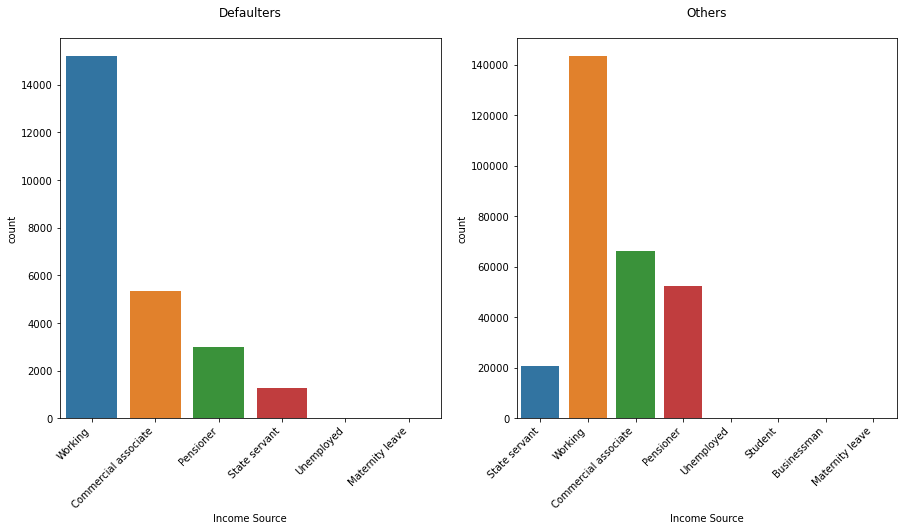

In [81]:
# Analyzing w.r.t Income Type column

category1 = application_df1['NAME_INCOME_TYPE']
category2 = application_df0['NAME_INCOME_TYPE']
xlabel = 'Income Source'

univariate_categorical_plot(category1, category2, xlabel)


Here the numbers are high for Working people in both cases. Let's see the % age of defaulters for these categories.

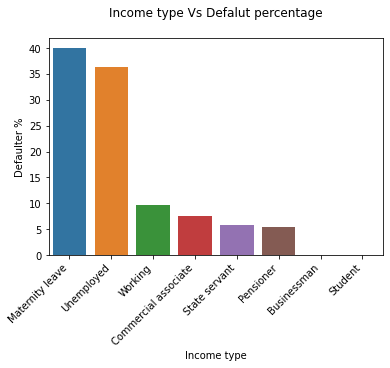

In [82]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'NAME_INCOME_TYPE'
title = 'Income type Vs Defalut percentage\n'
xlabel = 'Income type'
ylabel = 'Defaulter %'

perc_defaulter(col1, col2, title, xlabel, ylabel)


Now, we can see that the people on Maternity leave and unemployed categories are more likely to fail to repay.

##### NAME_EDUCATION_TYPE

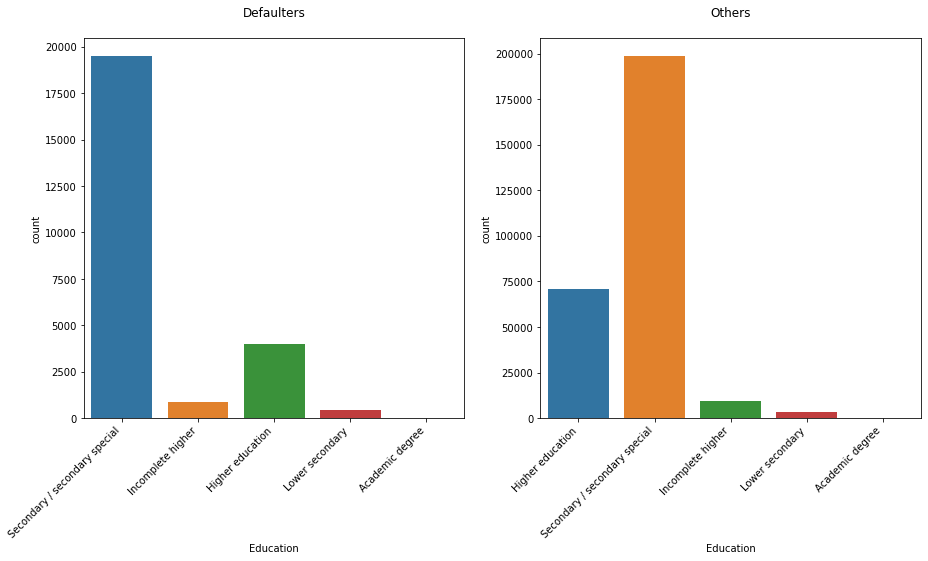

In [83]:
# Analyzing w.r.t Education Type column

category1 = application_df1['NAME_EDUCATION_TYPE']
category2 = application_df0['NAME_EDUCATION_TYPE']
xlabel = 'Education'

univariate_categorical_plot(category1, category2, xlabel)


Again, people with secondary education level have maximum count in either cases. Let's plot the % age graph.

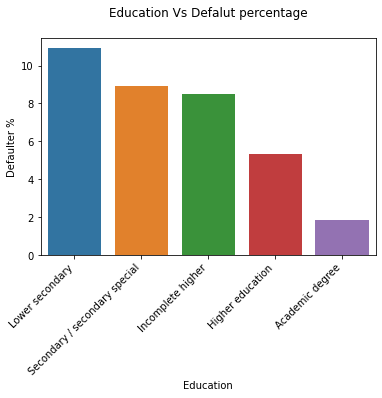

In [84]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'NAME_EDUCATION_TYPE'
title = 'Education Vs Defalut percentage\n'
xlabel = 'Education'
ylabel = 'Defaulter %'

perc_defaulter(col1, col2, title, xlabel, ylabel)


Now, this plot says people with lower secondary education level are mosre likely to fail repayment.

##### NAME_FAMILY_STATUS

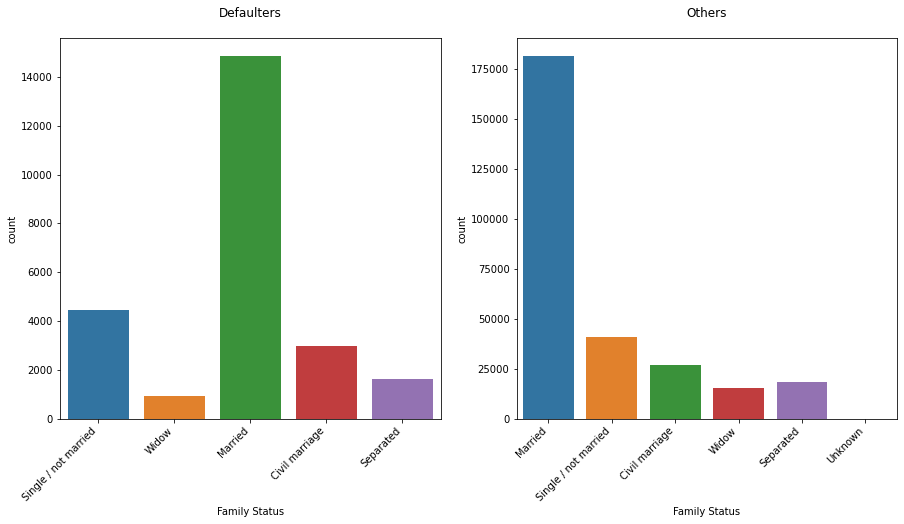

In [85]:
# Analyzing w.r.t Family Status Type column

category1 = application_df1['NAME_FAMILY_STATUS']
category2 = application_df0['NAME_FAMILY_STATUS']
xlabel = 'Family Status'

univariate_categorical_plot(category1, category2, xlabel)

No. of married applicants are more in both cases.

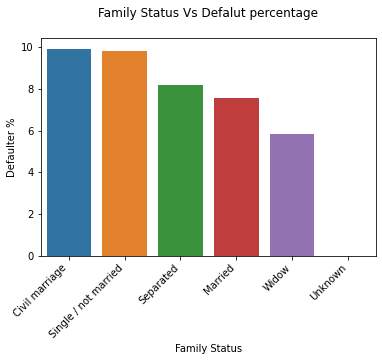

In [86]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'NAME_FAMILY_STATUS'
title = 'Family Status Vs Defalut percentage\n'
xlabel = 'Family Status'
ylabel = 'Defaulter %'

perc_defaulter(col1, col2, title, xlabel, ylabel)


Civil marriage and singles are more likely to default.

##### NAME_HOUSING_TYPE

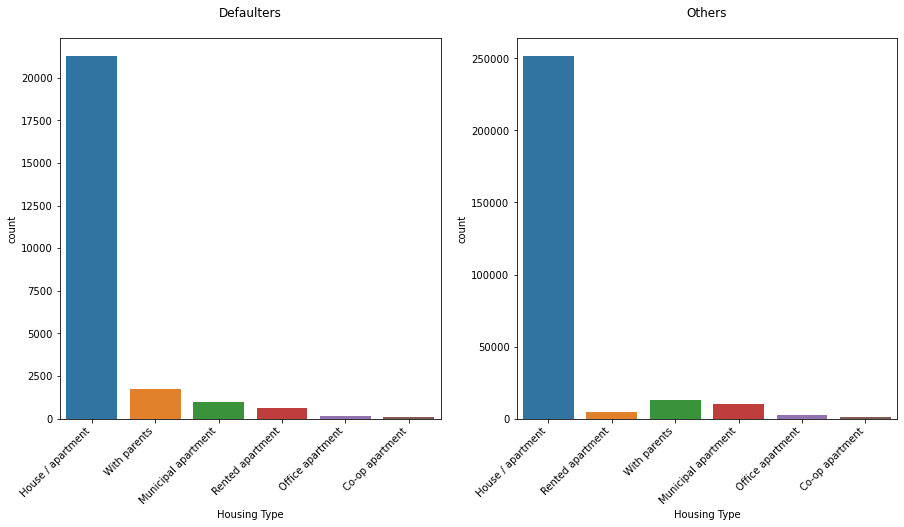

In [87]:
# Analyzing w.r.t Housing Type Type column


category1 = application_df1['NAME_HOUSING_TYPE']
category2 = application_df0['NAME_HOUSING_TYPE']
xlabel = 'Housing Type'

univariate_categorical_plot(category1, category2, xlabel)

A major count of applicants stay in house/apartment. Very less people stay in office or co-op apartments.

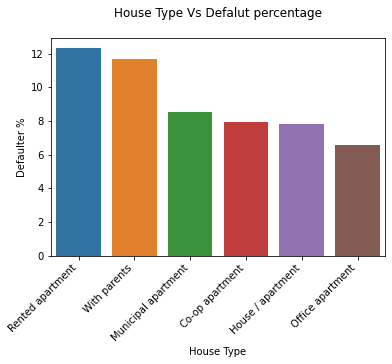

In [88]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'NAME_HOUSING_TYPE'
title = 'House Type Vs Defalut percentage\n'
xlabel = 'House Type'
ylabel = 'Defaulter %'

perc_defaulter(col1, col2, title, xlabel, ylabel)

Most of the applicants who are likely to default are either staying in a rented apartment or with parents compared to other housing types.

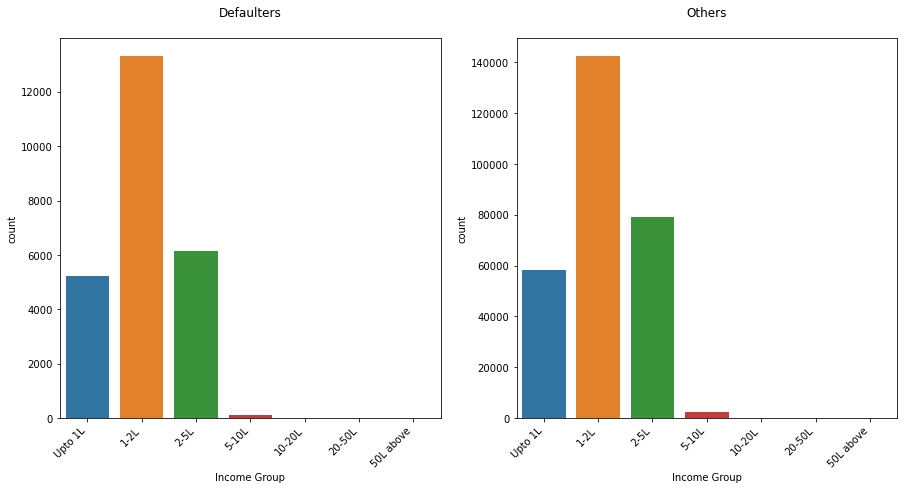

In [89]:
# Analyzing w.r.t Income Group column

category1 = application_df1['INCOME_GROUP']
category2 = application_df0['INCOME_GROUP']
xlabel = 'Income Group'

univariate_categorical_plot(category1, category2, xlabel)


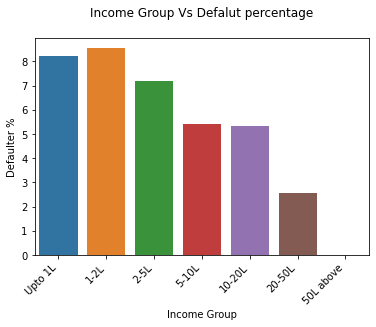

In [90]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'INCOME_GROUP'
title = 'Income Group Vs Defalut percentage\n'
xlabel = 'Income Group'
ylabel = 'Defaulter %'

perc_defaulter(col1, col2, title, xlabel, ylabel)

- Lower the income group higher than chance of defaulting.
- Maximum defaulting income group is 1-2 Lakhs

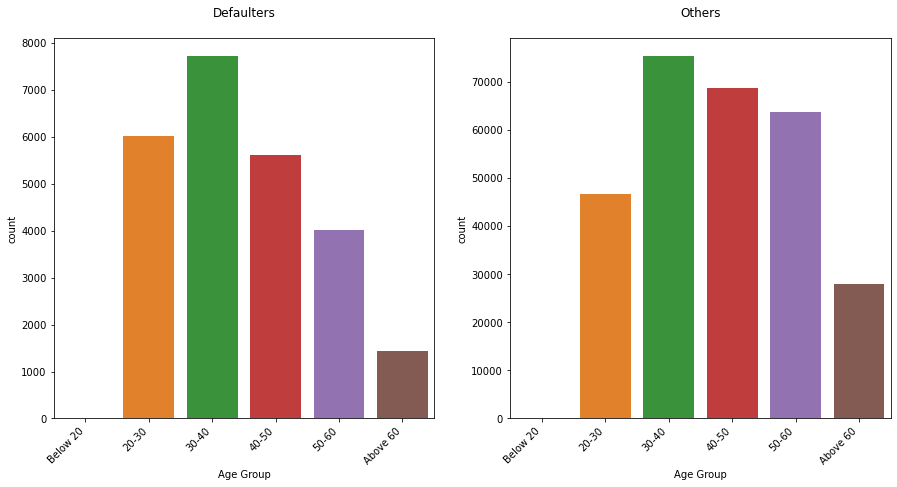

In [91]:
# Analyzing w.r.t Income Group column

category1 = application_df1['AGE_GROUP']
category2 = application_df0['AGE_GROUP']
xlabel = 'Age Group'

univariate_categorical_plot(category1, category2, xlabel)

From these plots it seems people in the age range 30-40 are more likely to default.

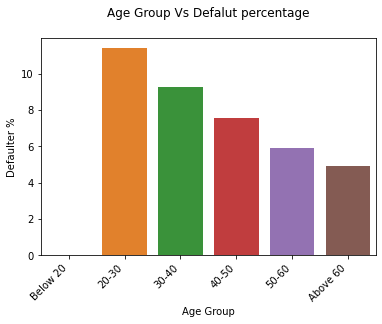

In [92]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'AGE_GROUP'
title = 'Age Group Vs Defalut percentage\n'
xlabel = 'Age Group'
ylabel = 'Defaulter %'

perc_defaulter(col1, col2, title, xlabel, ylabel)

- However, this plot says, the percentage of loan default is highest in the age group 20-30. 
- The loan default percentage decreases with increase in age.

##### Numeric variable Analysis

Here we are going to consider the below numeric columns and draw are conclusion on them.

- AMT_INCOME_TOTAL
- AMT_CREDIT 
- AMT_ANNUITY 
- AMT_GOODS_PRICE
- CNT_CHILDREN 
- DAYS_BIRTH

In [93]:
# Defining a function to plot univariate numerical columns

def univariate_numerical_plots(col1, col2, title):
    sns.distplot(col1 , hist=False, label='Defaulters')
    sns.distplot(col2 , hist=False, label='Others')
    plt.title(title)
    plt.legend()
    plt.show()

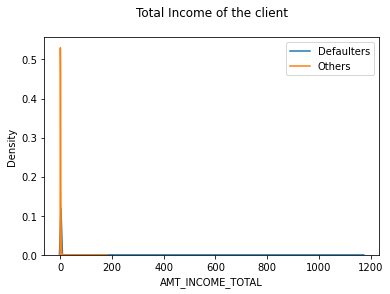

In [94]:
# Plotting AMT_INCOME_TOTAL 

col1 = application_df1['AMT_INCOME_TOTAL']/100000
col2 = application_df0['AMT_INCOME_TOTAL']/100000
title = 'Total Income of the client\n'

univariate_numerical_plots(col1, col2, title)


Most of the applicants are in low income range.

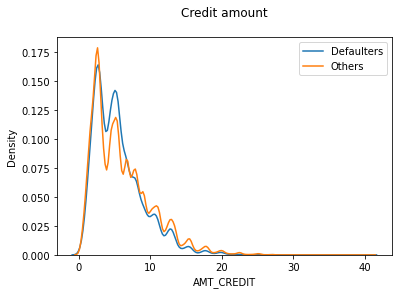

In [95]:
# Plotting AMT_CREDIT 

col1 = application_df1['AMT_CREDIT']/100000
col2 = application_df0['AMT_CREDIT']/100000
title = 'Credit amount\n'

univariate_numerical_plots(col1, col2, title)


Most of the loans are given with credit amount less than 10 lakhs.

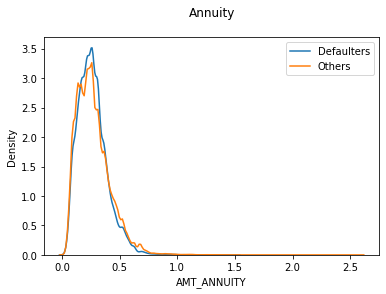

In [96]:
# Plotting AMT_ANNUITY 

col1 = application_df1['AMT_ANNUITY']/100000
col2 = application_df0['AMT_ANNUITY']/100000
title = 'Annuity\n'

univariate_numerical_plots(col1, col2, title)


Most of the loan annuity is less than 75, 000.

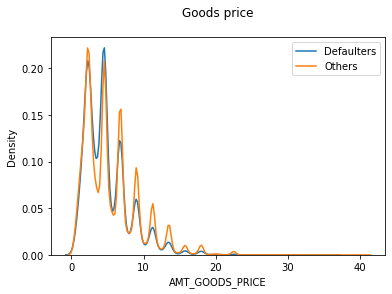

In [97]:
# Plotting AMT_GOODS_PRICE 

col1 = application_df1['AMT_GOODS_PRICE']/100000
col2 = application_df0['AMT_GOODS_PRICE']/100000
title = 'Goods price\n'

univariate_numerical_plots(col1, col2, title)


Goods amount price is mostly less than 15 lakhs.

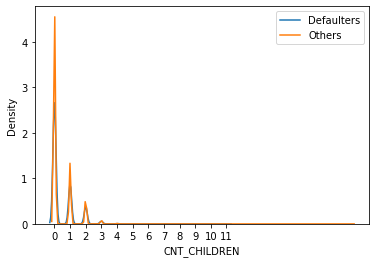

In [98]:
# Plotting CNT_CHILDREN 

sns.distplot(application_df1['CNT_CHILDREN'],hist=False, label='Defaulters')
sns.distplot(application_df0['CNT_CHILDREN'],hist=False, label='Others')
ticks = [0,1,2,3,4,5,6,7,8,9,10,11]
plt.xticks(ticks)
plt.legend()
plt.show()

Majority of the applicants are having no children. Mostly they have 3 or less children.

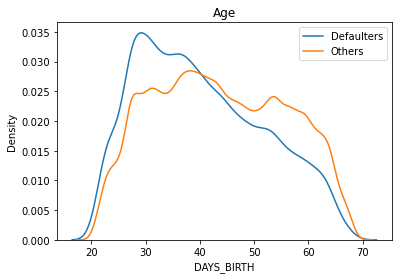

In [99]:
# Plotting DAYS_BIRTH 

col1 = application_df1['DAYS_BIRTH']//365
col2 = application_df0['DAYS_BIRTH']//365
title = 'Age'

univariate_numerical_plots(col1, col2, title)


Most of the defaulters are in 25-40 age group. Above 40, the number of defaulters tends to decrease.

#### 2.4.4	Correlation

In [100]:
corr_df1 = application_df1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_CHILDREN']].corr()
corr_df1

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_CHILDREN
AMT_INCOME_TOTAL,1.000000,0.038131,0.046421,0.037583,-0.003096,-0.014977,0.004796
AMT_CREDIT,0.038131,1.000000,0.752195,0.983103,0.135316,0.001930,-0.001675
AMT_ANNUITY,0.046421,0.752195,1.000000,0.752699,0.014303,-0.081207,0.031257
AMT_GOODS_PRICE,0.037583,0.983103,0.752699,1.000000,0.135810,0.006642,-0.008112
DAYS_BIRTH,-0.003096,0.135316,0.014303,0.135810,1.000000,0.582185,-0.259109
DAYS_EMPLOYED,-0.014977,0.001930,-0.081207,0.006642,0.582185,1.000000,-0.192864
CNT_CHILDREN,0.004796,-0.001675,0.031257,-0.008112,-0.259109,-0.192864,1.000000


In [101]:
corr_df0 = application_df0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_CHILDREN']].corr()
corr_df0

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_CHILDREN
AMT_INCOME_TOTAL,1.000000,0.342799,0.418953,0.349462,-0.062609,-0.140392,0.027397
AMT_CREDIT,0.342799,1.000000,0.771309,0.987250,0.047378,-0.070104,0.003081
AMT_ANNUITY,0.418953,0.771309,1.000000,0.776686,-0.012263,-0.104978,0.020905
AMT_GOODS_PRICE,0.349462,0.987250,0.776686,1.000000,0.044565,-0.068609,-0.000525
DAYS_BIRTH,-0.062609,0.047378,-0.012263,0.044565,1.000000,0.626114,-0.336966
DAYS_EMPLOYED,-0.140392,-0.070104,-0.104978,-0.068609,0.626114,1.000000,-0.245174
CNT_CHILDREN,0.027397,0.003081,0.020905,-0.000525,-0.336966,-0.245174,1.000000


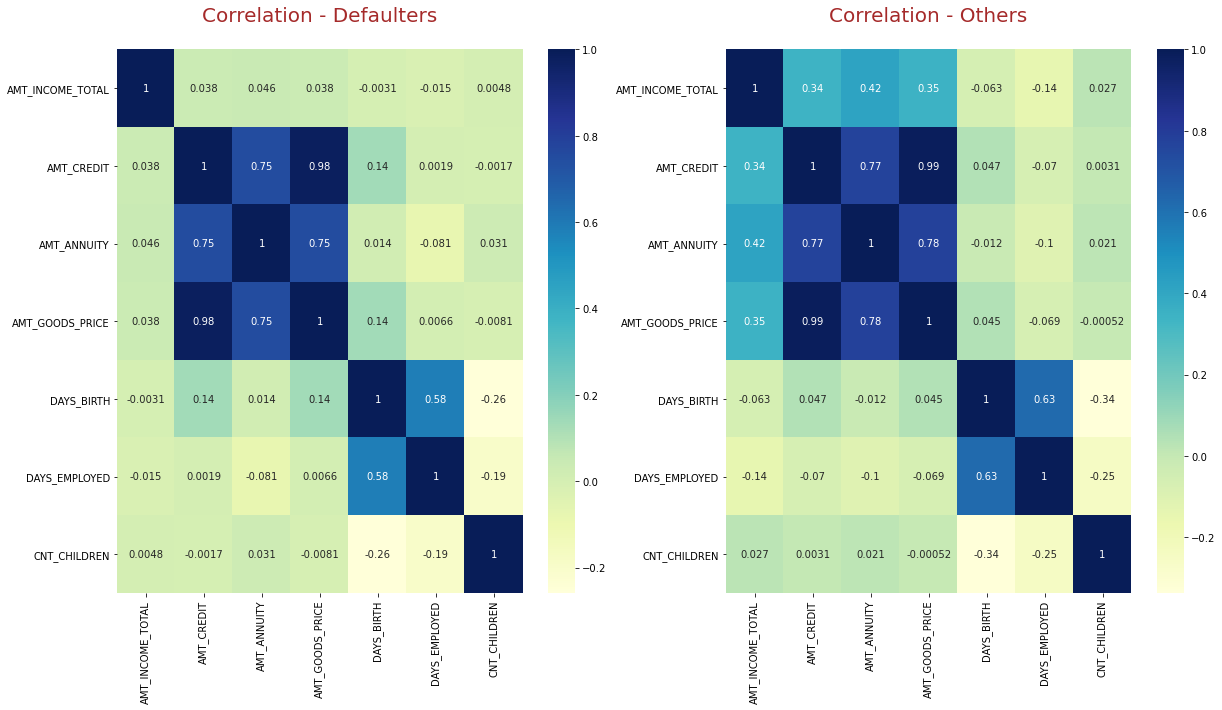

In [102]:
# Plot correlation heatmap for numerical variables

plt.figure(figsize=[20,10])

plt.subplot(1,2,1)
sns.heatmap(corr_df1, cmap="YlGnBu", annot = True)
plt.title('Correlation - Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(1,2,2)
sns.heatmap(corr_df0, cmap="YlGnBu", annot = True)
plt.title('Correlation - Others\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

AMT_CREDIT is strongly correlated to AMT_ANNUITY and AMT_GOODS_PRICE in both cases

#### 2.4.5	Bivariate Analysis

We will perform 3 types of bivariate analysis to understand the data better and draw some important insights.

- Categorical - Categorical Analysis
- Categorical - Continuous Analysis
- Continuous - Continuous Analysis

##### Categorical - Categorical Analysis

Columns considered -

- NAME_CONTRACT_TYPE - CODE_GENDER
- NAME_INCOME_TYPE - NAME_CONTRACT_TYPE
- INCOME_GROUP - CODE_GENDER
- CODE_GENDER - FLAG_OWN_REALTY
- NAME_HOUSING_TYPE - FLAG_OWN_REALTY
- NAME_HOUSING_TYPE - NAME_FAMILY_STATUS

In [103]:
# Defining function for categorical - categorical variable plotting

def cat_cat_plot(var1, var2, label):
    
    plt.figure(figsize=[20,5])
    
    plt.subplot(1,2,1)
    plt.title('Defaulters\n')
    sns.countplot(application_df1[var1],hue=application_df1[var2])
    plt.xlabel(label)
    plt.xticks(rotation = 45)

    plt.subplot(1,2,2)
    plt.title('Others\n')
    sns.countplot(application_df0[var1],hue=application_df0[var2])
    plt.xlabel(label)
    plt.xticks(rotation = 45)
    
    plt.legend()
    plt.show()

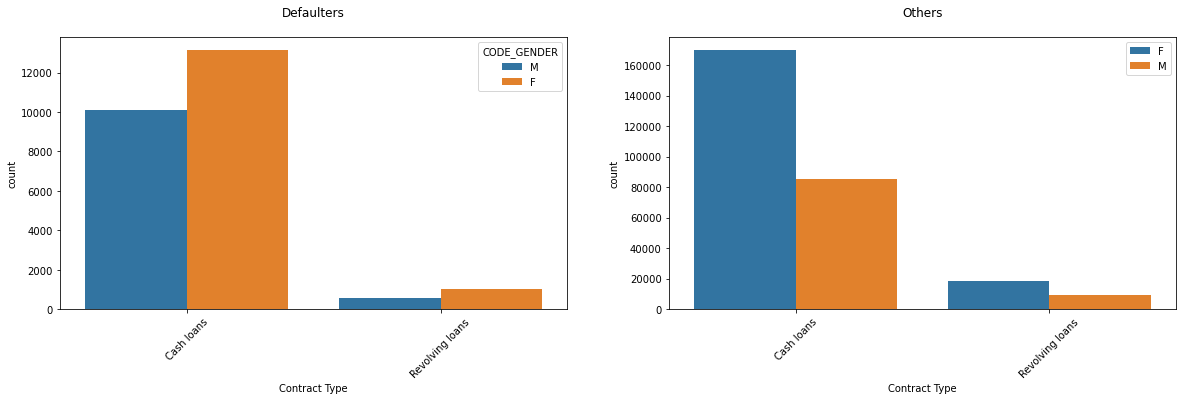

In [104]:
# NAME_CONTRACT_TYPE - CODE_GENDER

var1 = 'NAME_CONTRACT_TYPE'
var2 = 'CODE_GENDER'
label = 'Contract Type'

cat_cat_plot(var1, var2, label)

- Cash loan seems to be the preferred contract type across genders.
- Since the female count is higher in both default and non default cases , we cannot be sure that they are likely to default.

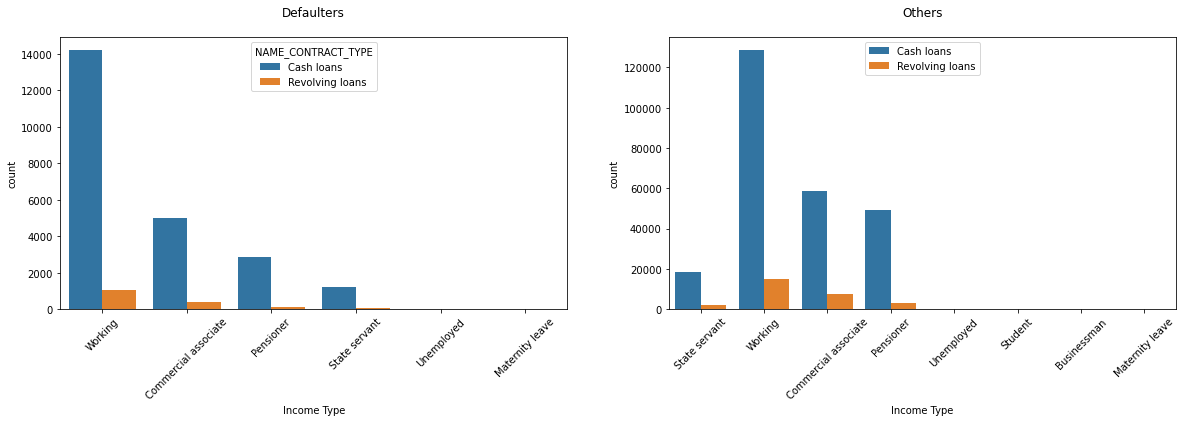

In [105]:
# NAME_INCOME_TYPE - NAME_CONTRACT_TYPE

var1 = 'NAME_INCOME_TYPE'
var2 = 'NAME_CONTRACT_TYPE'
label = 'Income Type'

cat_cat_plot(var1, var2, label)

- Across income types, cash loan seems to be the popular contract type.
- Most of the people who have taken loans are working class and they have taken cash loans mostly compared to revolving loans.
- People who have taken cash loans are likely to default as well

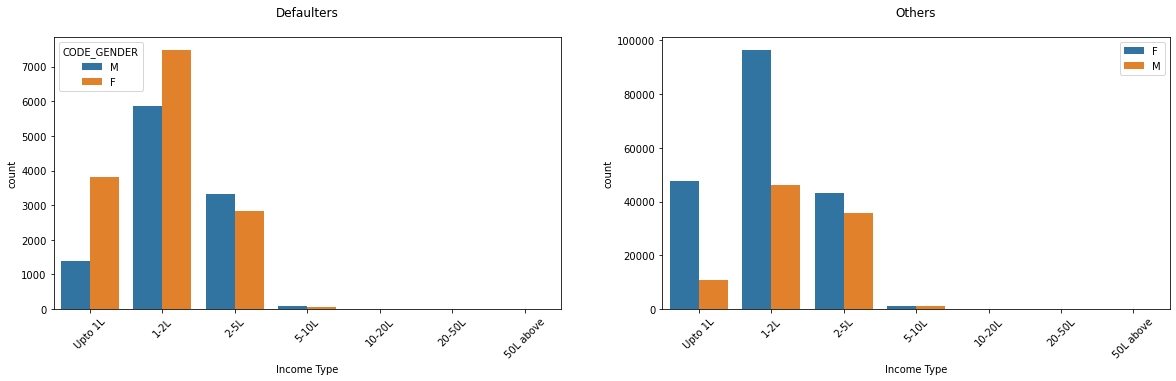

In [106]:
# INCOME_GROUP - CODE_GENDER

var1 = 'INCOME_GROUP'
var2 = 'CODE_GENDER'
label = 'Income Type'

cat_cat_plot(var1, var2, label)

Females have done timely repayment than that of males.

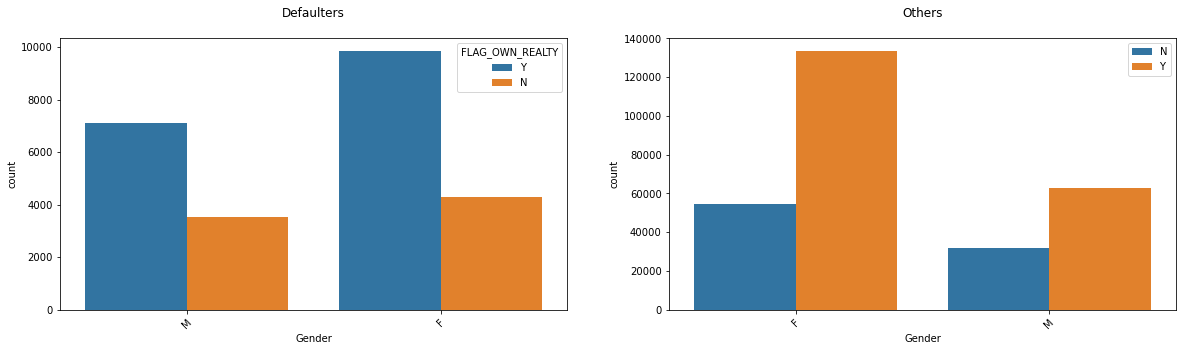

In [107]:
# CODE_GENDER - FLAG_OWN_REALTY

var1 = 'CODE_GENDER'
var2 = 'FLAG_OWN_REALTY'
label = 'Gender'

cat_cat_plot(var1, var2, label)

- Female borrowers are more likely to own flat/house.
- Since the female count is higher in both cases , we cannot be sure that they are likely to default.

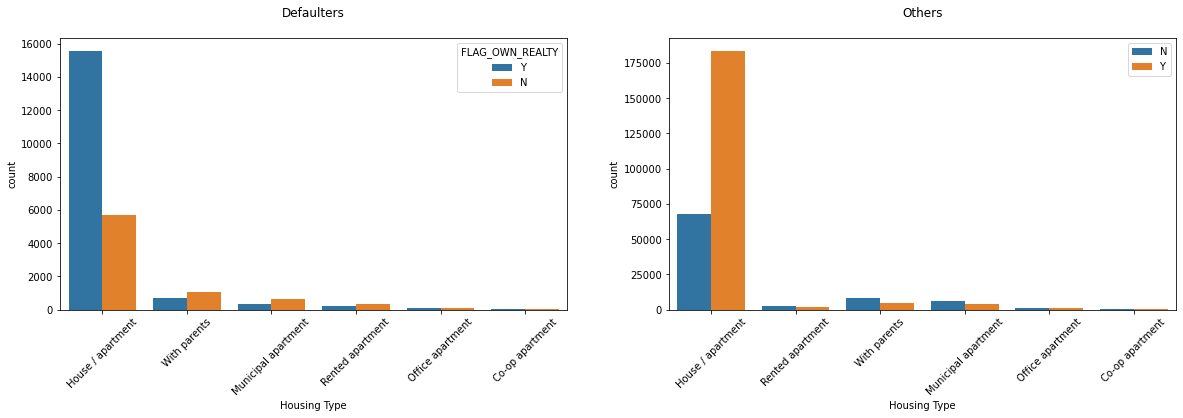

In [108]:
# NAME_HOUSING_TYPE - FLAG_OWN_REALTY

var1 = 'NAME_HOUSING_TYPE'
var2 = 'FLAG_OWN_REALTY'
label = 'Housing Type'

cat_cat_plot(var1, var2, label)

- Most of the applicants are the people who own a house/flat and are staying in own property.

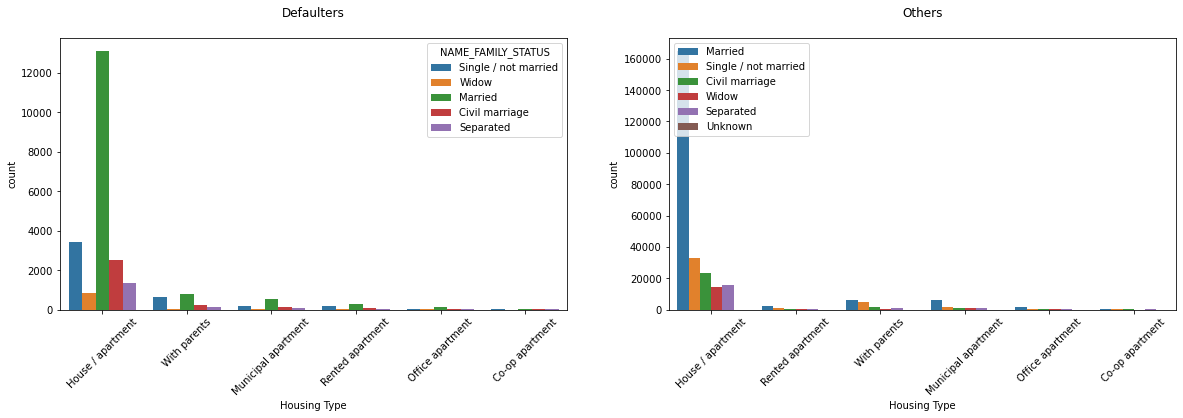

In [109]:
# NAME_HOUSING_TYPE - NAME_FAMILY_STATUS

var1 = 'NAME_HOUSING_TYPE'
var2 = 'NAME_FAMILY_STATUS'
label = 'Housing Type'

cat_cat_plot(var1, var2, label)

- Married loan applicants are mostly staying in house/apartment.
- Married people have highest count in both cases, i.e. married people staying in house/apartments are the group with maximum number of loan applications, and also they are the group with maximum number of defaulters.


##### Categorical - Continuous Analysis

Columns considered -

- NAME_CONTRACT_TYPE - AMT_CREDIT
- NAME_INCOME_TYPE - AMT_CREDIT
- NAME_EDUCATION_TYPE - AMT_ANNUITY
- NAME_HOUSING_TYPE - AMT_CREDIT
- OCCUPATION_TYPE - AMT_CREDIT

In [110]:
# Defining function for categorical - categorical variable plotting

def cat_cont_plot(var1, var2, xlabel, ylabel):
    
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title('Defaulters\n')
    sns.boxplot(x=var1,y=var2,data=application_df1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)

    plt.subplot(1,2,2)
    plt.title('Others\n')
    sns.boxplot(x=var1,y=var2,data=application_df0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    
    plt.show()

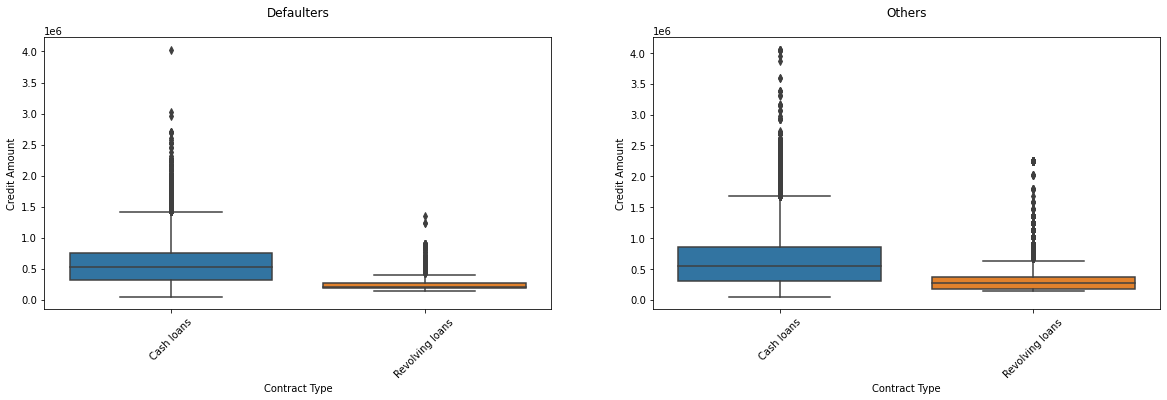

In [111]:
# NAME_CONTRACT_TYPE - AMT_CREDIT

var1 = 'NAME_CONTRACT_TYPE'
var2 = 'AMT_CREDIT'
xlabel = 'Contract Type'
ylabel = 'Credit Amount'

cat_cont_plot(var1, var2, xlabel, ylabel)

Loan credit amount for cash loan is higher than that of revolving loans.

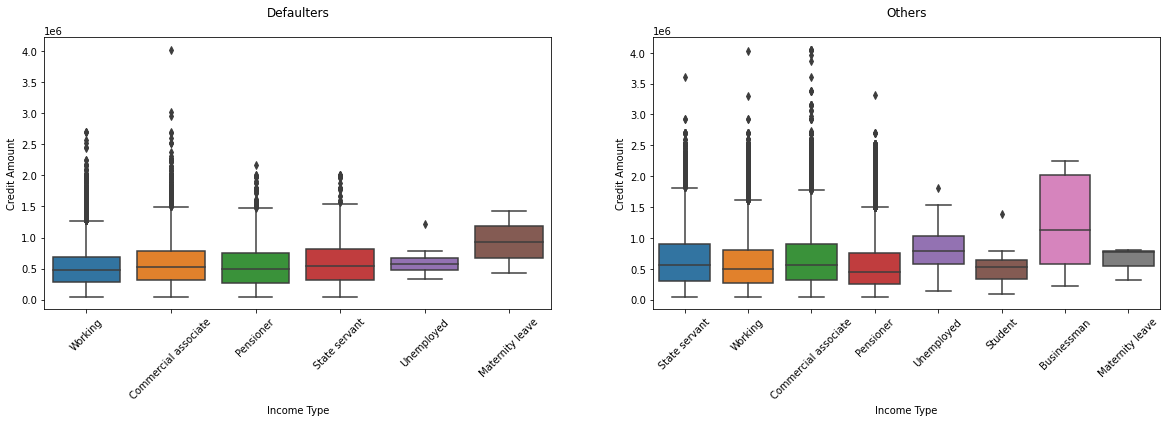

In [112]:
# NAME_INCOME_TYPE - AMT_CREDIT

var1 = 'NAME_INCOME_TYPE'
var2 = 'AMT_CREDIT'
xlabel = 'Income Type'
ylabel = 'Credit Amount'

cat_cont_plot(var1, var2, xlabel, ylabel)

- Loan amount taken by businessman is higher compared to the other income types.
- The median value of credit amount is some what similar for working, commercial associate, state servant and pensioner income type.
- People with maternity leave income type tend to default with higher credit amount.

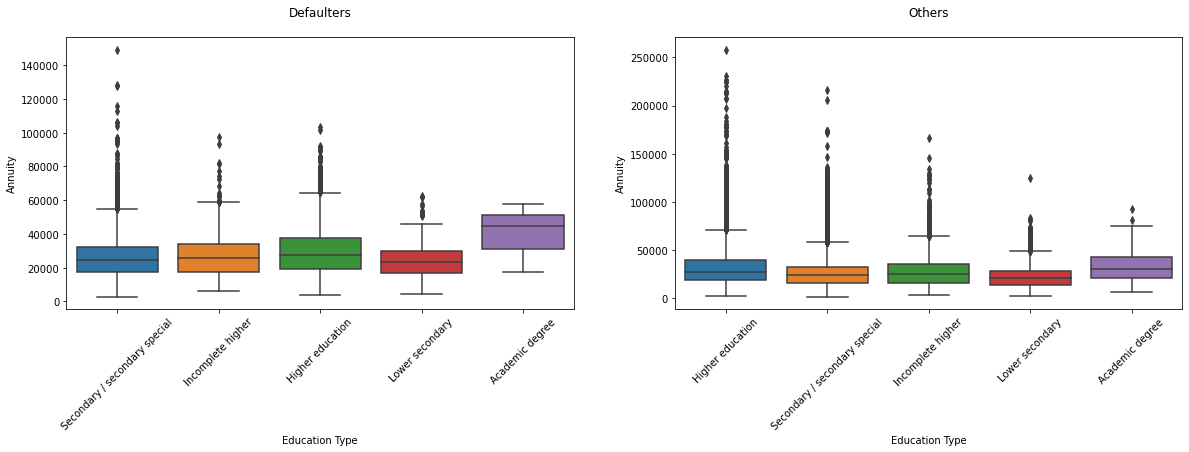

In [113]:
# NAME_EDUCATION_TYPE - AMT_ANNUITY

var1 = 'NAME_EDUCATION_TYPE'
var2 = 'AMT_ANNUITY'
xlabel = 'Education Type'
ylabel = 'Annuity'

cat_cont_plot(var1, var2, xlabel, ylabel)

- People having academic degree and higher education have more loan annuity amount compared to the other groups in both the default and non-default section.

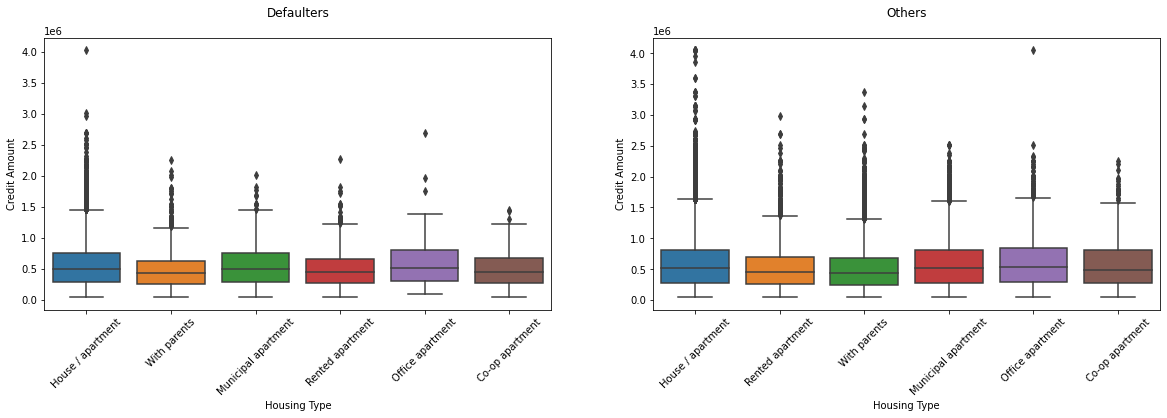

In [114]:
# NAME_HOUSING_TYPE - AMT_CREDIT

var1 = 'NAME_HOUSING_TYPE'
var2 = 'AMT_CREDIT'
xlabel = 'Housing Type'
ylabel = 'Credit Amount'

cat_cont_plot(var1, var2, xlabel, ylabel)

Loan amount is comparatively higher for people living in houses/appartments, municipal and office apartments.

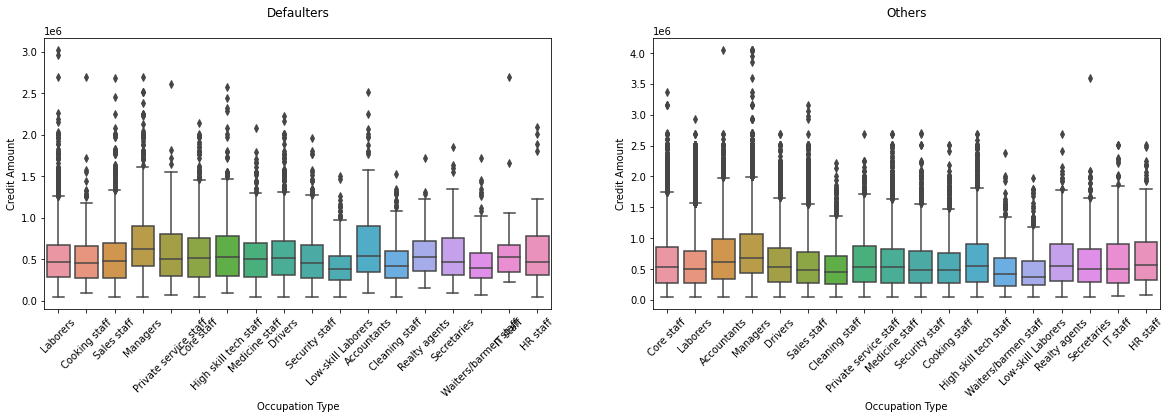

In [115]:
# OCCUPATION_TYPE - AMT_CREDIT

var1 = 'OCCUPATION_TYPE'
var2 = 'AMT_CREDIT'
xlabel = 'Occupation Type'
ylabel = 'Credit Amount'

cat_cont_plot(var1, var2, xlabel, ylabel)

Managers and Accountants have comparatively higher credit amount.

##### Continuous - Continuous Analysis

Here we have considered the below continuous value columns for plotting the graphs -

- AMT_CREDIT
- AMT_ANNUITY
- AMT_GOODS_PRICE
- AMT_INCOME_TOTAL

In [116]:
# Defining function for Continuous - continuous plot

def cont_cont_plot(col1, col2, xlabel, ylabel):
    
    plt.figure(figsize=[20,5])
    plt.subplot(1,2,1)
    plt.title('Defaulters\n')
    sns.scatterplot(x = col1, y = col2, data = application_df1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)

    plt.subplot(1,2,2)
    plt.title('Others\n')
    sns.scatterplot(x = col1, y = col2, data = application_df0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    
    plt.show()

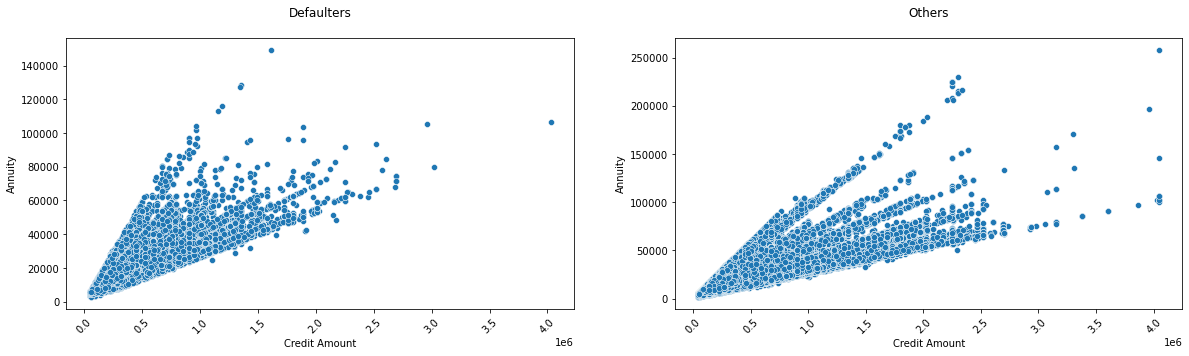

In [117]:
# AMT_CREDIT-AMT_ANNUITY

col1 = 'AMT_CREDIT'
col2 = 'AMT_ANNUITY'
xlabel = 'Credit Amount'
ylabel = 'Annuity'

cont_cont_plot(col1, col2, xlabel, ylabel)

AMT_CREDIT are AMT_ANNUITY seems to be correlated.

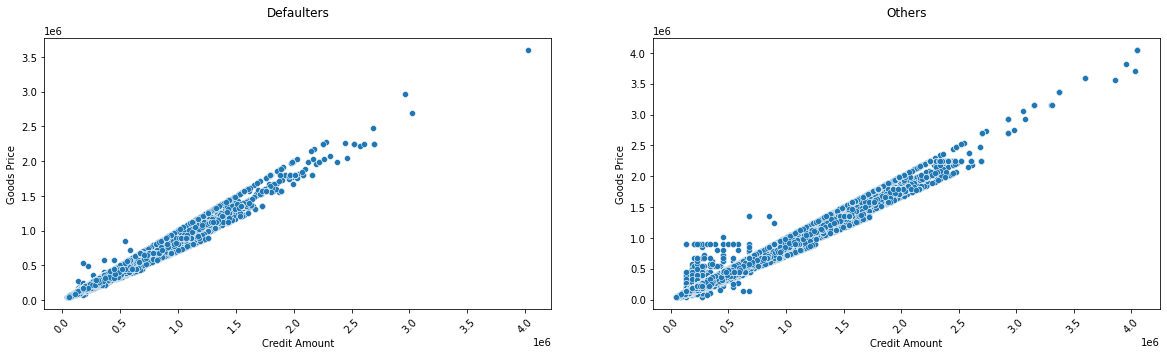

In [118]:
# AMT_CREDIT-AMT_GOODS_PRICE

col1 = 'AMT_CREDIT'
col2 = 'AMT_GOODS_PRICE'
xlabel = 'Credit Amount'
ylabel = 'Goods Price'

cont_cont_plot(col1, col2, xlabel, ylabel)

AMT_CREDIT are AMT_GOODS_PRICE seems to be correlated.

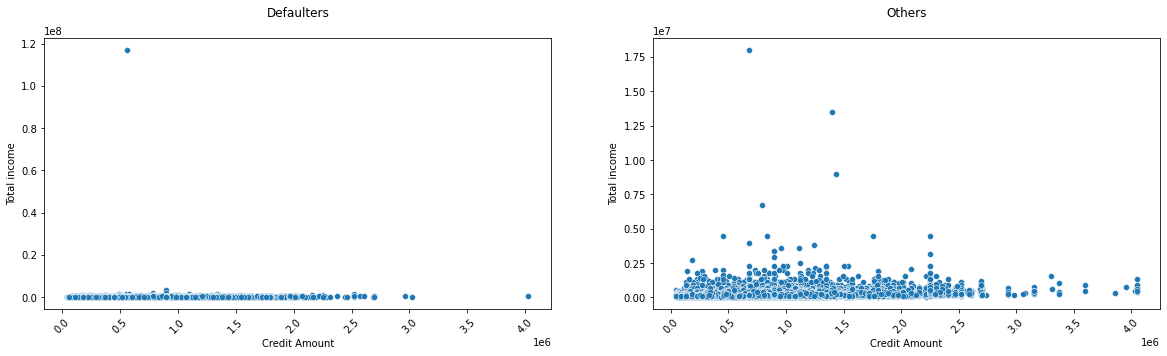

In [119]:
# AMT_CREDIT-AMT_INCOME_TOTAL

col1 = 'AMT_CREDIT'
col2 = 'AMT_INCOME_TOTAL'
xlabel = 'Credit Amount'
ylabel = 'Total income'

cont_cont_plot(col1, col2, xlabel, ylabel)

AMT_CREDITand AMT_INCOME_TOTAL does not seem to be correlated.

## 3. PREVIOUS LOAN APPLICATION DATA

We also have the previous application histories of the applicants. Let's explore that and see if we could find any trend.

### 3.1 Read and Inspect the Previous Data

In [120]:
# Read the previous data file

previous_df = pd.read_csv('previous_application.csv')
previous_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
# Check the number of rows and columns in the dataframe
previous_df.shape

(1670214, 37)

In [122]:
# Check the column-wise info of the dataframe
previous_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [123]:
# Check the summary for the numeric columns
previous_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### 3.2 Data Cleaning & Imputation - Suggestions

In [124]:
# Check for missing values in percentage 

round(100 * previous_df.isnull().mean(),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [125]:
# Extract the column names with more than 50% data missing and their respective missing value percentage

missing50 = list(filter(lambda x: x[1] > 50 , round(100 * previous_df.isnull().sum() / len(previous_df.index),2).iteritems()))

# Extract the column names from the above list

cols_to_drop = [i[0] for i in missing50]
cols_to_drop

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED']

In [126]:
# Remove the columns with more than 50% missing values

previous_df.drop(cols_to_drop, axis = 1, inplace = True)

# Check the shape 

previous_df.shape

(1670214, 33)

In [127]:
# Check the missing values for remaining
round(100 * previous_df.isnull().mean(),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
D

In [128]:
# Check the summary for NFLAG_INSURED_ON_APPROVAL

previous_df['NFLAG_INSURED_ON_APPROVAL'].describe()

count    997149.000000
mean          0.332570
std           0.471134
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64

Suggestions-

- NAME_TYPE_SUITE can also be dropped since the missing percentage is close to 50 
- NFLAG_INSURED_ON_APPROVAL - Since this is a flag that shows whether the client requested insurance during the previous application the value can either be 0 or 1. However, this column has 40% data missing. So, it would be safe to drop this column as well.


### 3.3 Data Standardization

- DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION, DAYS_DECISION - These columns seem to have some negative values. We must convert that to absolute value.

In [129]:
previous_df[['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION','DAYS_DECISION']].describe()

,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,DAYS_DECISION
count,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,1.670214e+06
mean,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,-8.806797e+02
std,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,7.790997e+02
min,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,-2.922000e+03
25%,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,-1.300000e+03
50%,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,-5.810000e+02
75%,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,-2.800000e+02
max,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,-1.000000e+00


In [130]:
# Create a column list for DAYS columns

col_list = ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION','DAYS_DECISION']

# Replace the values with their respective absolute values
for col in col_list:
    previous_df[col] = abs(previous_df[col])
    
# Verify the changes
previous_df[['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION','DAYS_DECISION']].describe()

,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,DAYS_DECISION
count,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,1.670214e+06
mean,342340.056543,15949.224065,35163.363265,78152.730207,83505.775017,8.806797e+02
std,88413.495220,72007.270877,106405.950190,148833.342466,152484.418802,7.790997e+02
min,2.000000,2.000000,0.000000,2.000000,2.000000,1.000000e+00
25%,365243.000000,475.000000,257.000000,455.000000,447.000000,2.800000e+02
50%,365243.000000,921.000000,741.000000,1155.000000,1171.000000,5.810000e+02
75%,365243.000000,1825.000000,1735.000000,2418.000000,2501.000000,1.300000e+03
max,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,2.922000e+03


### 3.4 Outlier Analysis

- For the columns AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT , let's plot outliers for better understanding.

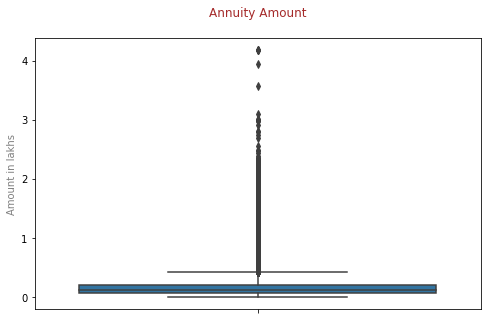

In [131]:
# Box plot AMT_ANNUITY

var = previous_df['AMT_ANNUITY']/100000
title = 'Annuity Amount\n'
label = 'Amount in lakhs'

outlier_plot(var,title,label)

In [132]:
# Check Summary

previous_df['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [133]:
# Check the quantiles

previous_df['AMT_ANNUITY'].quantile([0.5,0.7,0.90,0.95,0.99])

0.50    11250.0000
0.70    17783.1270
0.90    34703.8200
0.95    45336.7800
0.99    69685.7886
Name: AMT_ANNUITY, dtype: float64

The missing values can be replaced by the median

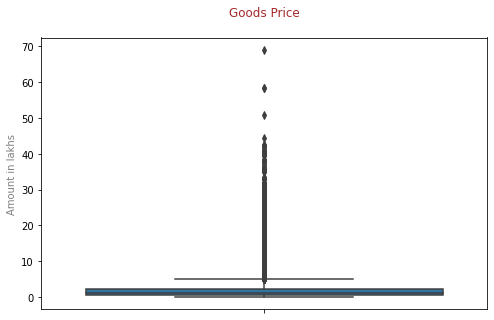

In [134]:
# Box plot AMT_GOODS_PRICE

var = previous_df['AMT_GOODS_PRICE']/100000
title = 'Goods Price\n'
label = 'Amount in lakhs'

outlier_plot(var,title,label)

In [135]:
# Check summary

previous_df['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [136]:
# Check the quantiles

previous_df['AMT_GOODS_PRICE'].quantile([0.5,0.7,0.90,0.95,0.99])

0.50     112320.0
0.70     211500.0
0.90     585000.0
0.95     900000.0
0.99    1395000.0
Name: AMT_GOODS_PRICE, dtype: float64

There are certain highly priced goods after 0.95 quantile. Here we can set a cap value to ignore very high goods price.

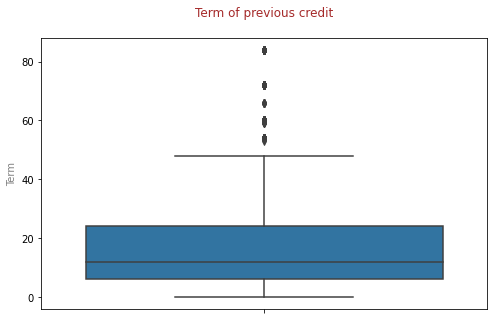

In [137]:
# Box plot CNT_PAYMENT

var = previous_df['CNT_PAYMENT']
title = 'Term of previous credit\n'
label = 'Term'

outlier_plot(var,title,label)

In [138]:
# Check summary

previous_df['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

- Missing values can be replaced with median and then we can change the data type to int.

## 4 MERGING DATA SETS

Merge the application data frame and previous application data frame

### 4.1 Merging the data sets

In [139]:
# Merge both application_df and previous_df

finaldf = pd.merge(application_df, previous_df, on='SK_ID_CURR', how = 'inner')

# verify

finaldf.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,INCOME_GROUP,CREDIT_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,20-30,2-5L,1-5L,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,40-50,2-5L,10-20L,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,40-50,2-5L,10-20L,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Fur

In [140]:
# Check the column info

finaldf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 116 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   SK_ID_CURR                    int64   
 1   TARGET                        int64   
 2   NAME_CONTRACT_TYPE_x          object  
 3   CODE_GENDER                   object  
 4   FLAG_OWN_CAR                  object  
 5   FLAG_OWN_REALTY               object  
 6   CNT_CHILDREN                  int64   
 7   AMT_INCOME_TOTAL              float64 
 8   AMT_CREDIT_x                  float64 
 9   AMT_ANNUITY_x                 float64 
 10  AMT_GOODS_PRICE_x             float64 
 11  NAME_TYPE_SUITE_x             object  
 12  NAME_INCOME_TYPE              object  
 13  NAME_EDUCATION_TYPE           object  
 14  NAME_FAMILY_STATUS            object  
 15  NAME_HOUSING_TYPE             object  
 16  REGION_POPULATION_RELATIVE    float64 
 17  DAYS_BIRTH                    int32   
 18  D

In [141]:
# Rename the duplicated columns

finaldf = finaldf.rename({'NAME_CONTRACT_TYPE_y':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_ANNUITY_y':'AMT_ANNUITY_PREV',
                        'AMT_CREDIT_y':'AMT_CREDIT_PREV',
                         'AMT_GOODS_PRICE_y':'AMT_GOODS_PRICE_PREV',
                         'NAME_TYPE_SUITE_y':'NAME_TYPE_SUITE_PREV',
                         'NAME_TYPE_SUITE_x':'NAME_TYPE_SUITE_CURR',
                         'AMT_GOODS_PRICE_x':'AMT_GOODS_PRICE_CURR',
                         'AMT_ANNUITY_x':'AMT_ANNUITY_CURR',
                         'AMT_CREDIT_x':'AMT_CREDIT_CURR',
                         'NAME_CONTRACT_TYPE_x':'NAME_CONTRACT_TYPE_CURR'}, axis=1)

In [142]:
#Verify

finaldf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 116 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   SK_ID_CURR                    int64   
 1   TARGET                        int64   
 2   NAME_CONTRACT_TYPE_CURR       object  
 3   CODE_GENDER                   object  
 4   FLAG_OWN_CAR                  object  
 5   FLAG_OWN_REALTY               object  
 6   CNT_CHILDREN                  int64   
 7   AMT_INCOME_TOTAL              float64 
 8   AMT_CREDIT_CURR               float64 
 9   AMT_ANNUITY_CURR              float64 
 10  AMT_GOODS_PRICE_CURR          float64 
 11  NAME_TYPE_SUITE_CURR          object  
 12  NAME_INCOME_TYPE              object  
 13  NAME_EDUCATION_TYPE           object  
 14  NAME_FAMILY_STATUS            object  
 15  NAME_HOUSING_TYPE             object  
 16  REGION_POPULATION_RELATIVE    float64 
 17  DAYS_BIRTH                    int32   
 18  D

In [143]:
# Remove unwanted columns

finaldf.drop(['REGION_POPULATION_RELATIVE','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 
              'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
              'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
              'LIVE_CITY_NOT_WORK_CITY', 'YEARS_BEGINEXPLUATATION_AVG','YEARS_BEGINEXPLUATATION_MEDI',
              'YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_AVG','FLOORSMAX_MODE','FLOORSMAX_MEDI','EMERGENCYSTATE_MODE',
              'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
             'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
              'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR',
             'DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION',
             'NFLAG_INSURED_ON_APPROVAL', 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5', 
              'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
              'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11',
              'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
              'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19',
              'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE','FLAG_CONT_MOBILE', 
              'FLAG_PHONE','FLAG_EMAIL', 'EXT_SOURCE_2',
              'EXT_SOURCE_3', 'TOTALAREA_MODE','FLAG_LAST_APPL_PER_CONTRACT',
              'NFLAG_LAST_APPL_IN_DAY', 'SELLERPLACE_AREA','WEEKDAY_APPR_PROCESS_START_x',
              'WEEKDAY_APPR_PROCESS_START_y','HOUR_APPR_PROCESS_START_x','HOUR_APPR_PROCESS_START_y'],axis=1,inplace=True)

In [144]:
#Verify

finaldf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 47 columns):
 #   Column                   Non-Null Count    Dtype   
---  ------                   --------------    -----   
 0   SK_ID_CURR               1413701 non-null  int64   
 1   TARGET                   1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_CURR  1413701 non-null  object  
 3   CODE_GENDER              1413646 non-null  object  
 4   FLAG_OWN_CAR             1413701 non-null  object  
 5   FLAG_OWN_REALTY          1413701 non-null  object  
 6   CNT_CHILDREN             1413701 non-null  int64   
 7   AMT_INCOME_TOTAL         1413701 non-null  float64 
 8   AMT_CREDIT_CURR          1413701 non-null  float64 
 9   AMT_ANNUITY_CURR         1413608 non-null  float64 
 10  AMT_GOODS_PRICE_CURR     1412493 non-null  float64 
 11  NAME_TYPE_SUITE_CURR     1410175 non-null  object  
 12  NAME_INCOME_TYPE         1413701 non-null  object  
 13  NAME_EDUCATION_TYPE      14

In [145]:
finaldf.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_CURR,AMT_ANNUITY_CURR,AMT_GOODS_PRICE_CURR,NAME_TYPE_SUITE_CURR,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AGE_GROUP,INCOME_GROUP,CREDIT_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_GOODS_PRICE_PREV,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_PREV,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648,2120,Laborers,1.0,Business Entity Type 3,20-30,2-5L,1-5L,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186,291,Core staff,2.0,School,40-50,2-5L,10-20L,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186,291,Core staff,2.0,School,40-50,2-5L,10-20L,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186,291,Core staff,2.0,School,40-50,2-5L,10-20L,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260,2531,Laborers,1.0,Government,50-60,Upto 1L,1-5L,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,Connectivity,4.0,middle,POS mobile without interest


### 4.2 Univariate Analysis

####  4.2.1 Categorical Variable Analysis

 Let us consider the below variables for categorical analysis
  
 -NAME_CONTRACT_STATUS
 -CODE_REJECT_REASON
 

In [221]:
# Defining a function to plot univariate categorical variables

def univariate_prev_categorical_plot(var1,var2, xlabel):
    
    plt.figure(figsize = [15,7])
    plt.subplot(1,2,1)
    sns.countplot(finaldf[var1],hue=finaldf[var2])
    plt.title('PreviousLoan')
    plt.xlabel(xlabel)
    plt.xticks(rotation=45, ha='right')
     
    plt.legend(title='TARGET')    
    plt.show()

NAME_CONTRACT_STATUS

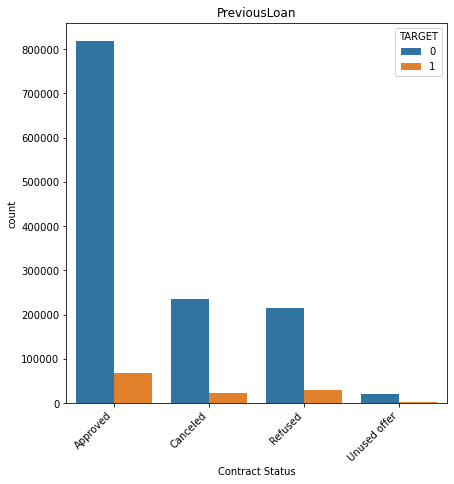

In [222]:
# Analyzing w.r.t Contract Status  Type column

var1 = 'NAME_CONTRACT_STATUS'
var2 = 'TARGET'
label ='Contract Status'

univariate_prev_categorical_plot(var1, var2, label)

Majority of the Loans were in approved Status and were paid on time.

NAME_CONTRACT_TYPE_CURR

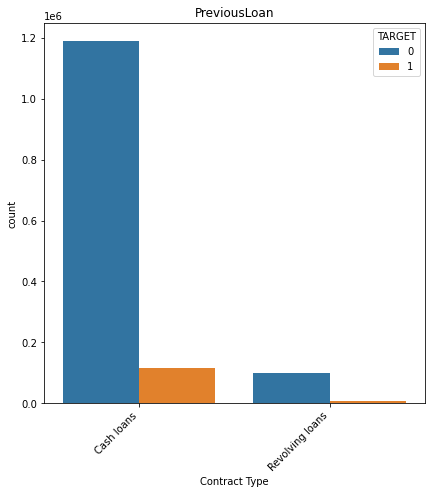

In [223]:
# Analyzing w.r.t Contract Type   column

var1 = 'NAME_CONTRACT_TYPE_CURR'
var2 = 'TARGET'
label = 'Contract Type'

univariate_prev_categorical_plot(var1, var2, label)

High number of loans are applied for cash loans

### 4.3 Correlation

### 4.4 Bivariate Analysis

We will perform 3 types of bivariate analysis to understand the data better and draw some important insights.
 
Categorical -  Categorical Analysis
Categorical -  Continuous Analysis
Continuous -   Continuous Analysis

####  4.4.1 Categorical-Categorical Analysis


For this category we have identified the below combinations from the dataframe

- NAME_CASH_LOAN_PURPOSE-OCCUPATION_TYPE
- NAME_CONTRACT_STATUS-CODE_REJECT_REASON


NAME_CASH_LOAN_PURPOSE-OCCUPATION_TYPE

In [216]:
for i in ["TARGET","NAME_CASH_LOAN_PURPOSE","OCCUPATION_TYPE"]:
    print(i)
    print(finaldf[i].value_counts())

TARGET
0    1291341
1     122360
Name: TARGET, dtype: int64
NAME_CASH_LOAN_PURPOSE
XAP                                 786937
XNA                                 567351
Repairs                              20117
Other                                13432
Urgent needs                          7236
Buying a used car                     2469
Building a house or an annex          2344
Everyday expenses                     2052
Medicine                              1871
Payments on other loans               1573
Education                             1334
Journey                               1042
Purchase of electronic equipment       934
Buying a new car                       886
Wedding / gift / holiday               801
Buying a home                          701
Car repairs                            691
Furniture                              660
Buying a holiday home / land           463
Business development                   359
Gasification / water supply            251
Buying a garag

In [207]:
def cat_cat_plot(var1, var2,var3, label):
    
    plt.figure(figsize=[20,5])
    
    plt.subplot(1,2,1)
    plt.title('Cash Loan Purpose')
    sns.countplot(finaldf[var1],hue=finaldf[var2])
    plt.xlabel(label)
    plt.xticks(rotation = 90)

    plt.subplot(1,2,2)
    plt.title('Occupation Type')
    sns.countplot(finaldf[var3],hue=finaldf[var2])
    plt.xlabel(label)
    plt.xticks(rotation = 90)
    
    plt.legend()
    plt.show()

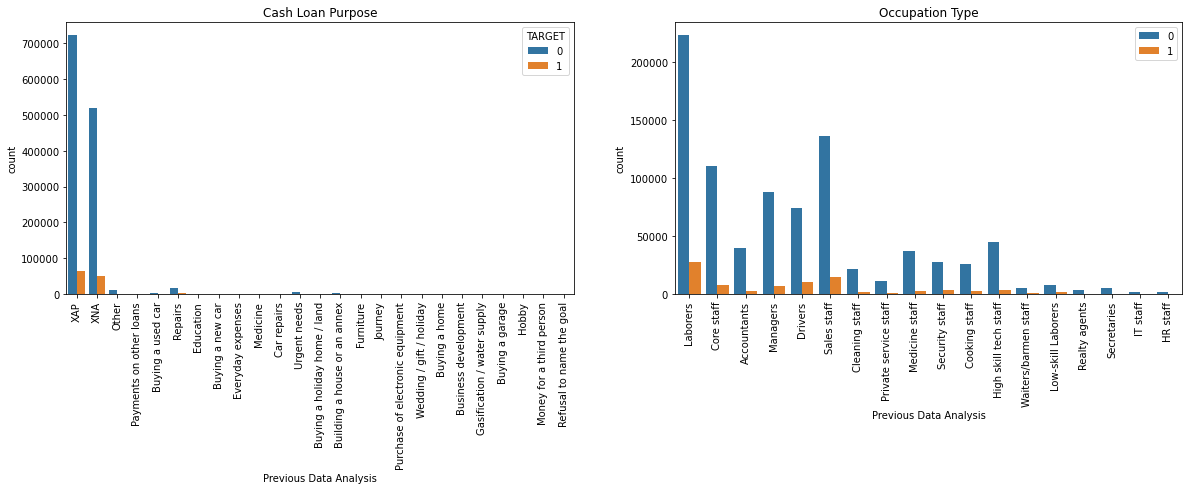

In [208]:
var1 = 'NAME_CASH_LOAN_PURPOSE'
var2 = 'TARGET'
var3 = 'OCCUPATION_TYPE'
label = 'Previous Data Analysis'

cat_cat_plot(var1, var2,var3, label)

In the occupation category we see that the Labourers have taken more loan and the default rate is also higher for the labour category .The purpose of the Cash Loan mostly look empty in most cases ,hence not much of inference can be drawn from this category.

NAME_CONTRACT_STATUS-CODE_REJECT_REASON

In [217]:
for i in ["TARGET","NAME_CONTRACT_STATUS","CODE_REJECT_REASON"]:
    print(i)
    print(finaldf[i].value_counts())

TARGET
0    1291341
1     122360
Name: TARGET, dtype: int64
NAME_CONTRACT_STATUS
Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: NAME_CONTRACT_STATUS, dtype: int64
CODE_REJECT_REASON
XAP       1145533
HC         145984
LIMIT       47773
SCO         32636
CLIENT      22771
SCOFR       10875
XNA          4378
VERIF        3079
SYSTEM        672
Name: CODE_REJECT_REASON, dtype: int64


In [209]:
def cat_cat_plot(var1, var2,var3, label):
    
    plt.figure(figsize=[20,5])
    
    plt.subplot(1,2,1)
    plt.title('Contract Status')
    sns.countplot(finaldf[var1],hue=finaldf[var2])
    plt.xlabel(label)
    plt.xticks(rotation = 90)

    plt.subplot(1,2,2)
    plt.title('Rejection Reason')
    sns.countplot(finaldf[var3],hue=finaldf[var2])
    plt.xlabel(label)
    plt.xticks(rotation = 90)
    
    plt.legend()
    plt.show()

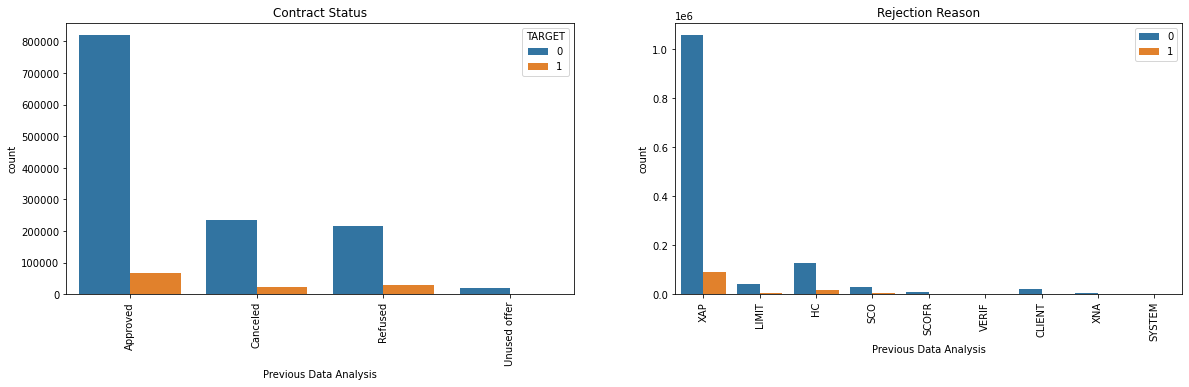

In [210]:
var1 = 'NAME_CONTRACT_STATUS'
var2 = 'TARGET'
var3 = 'CODE_REJECT_REASON'
label = 'Previous Data Analysis'

cat_cat_plot(var1, var2,var3, label)

In this we can infer that most of the approved loans are paid back on time .
Most of the loans have been rejected for an unknown reason(looks like a missing value)

<AxesSubplot:xlabel='CNT_PAYMENT'>

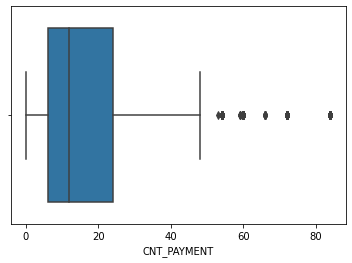

In [147]:
sns.boxplot(previous_df['CNT_PAYMENT'])

In [224]:
df = finaldf[finaldf['NAME_CONTRACT_STATUS']=='Refused'][['NAME_CONTRACT_STATUS','TARGET']]
df['TARGET'].value_counts()

0    215952
1     29438
Name: TARGET, dtype: int64